## Check for feature importance

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import plotly.io as pio
pio.renderers.default='notebook'
from plotly.subplots import make_subplots
import folium
from statsmodels.graphics.gofplots import qqplot

In [2]:
tripdata = pd.read_csv("../dataset/complete_bike_sharing.csv")
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353892 entries, 0 to 353891
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             353892 non-null  int64  
 1   starttime                353892 non-null  object 
 2   stoptime                 353892 non-null  object 
 3   start station id         353892 non-null  int64  
 4   start station name       353892 non-null  object 
 5   start station latitude   353892 non-null  float64
 6   start station longitude  353892 non-null  float64
 7   end station id           353892 non-null  int64  
 8   end station name         353892 non-null  object 
 9   end station latitude     353892 non-null  float64
 10  end station longitude    353892 non-null  float64
 11  bikeid                   353892 non-null  int64  
 12  usertype                 353892 non-null  object 
 13  birth year               353892 non-null  int64  
 14  gend

In [3]:
# def convert_min(x):
#     return x/60
# tripdata['tripduration'] = tripdata['tripduration'].apply(convert_min)
tripdata.head(3)

tripduration                starttime                 stoptime  \
0           932  2018-01-01 02:06:17.541  2018-01-01 02:21:50.027   
1           550  2018-01-01 12:06:18.039  2018-01-01 12:15:28.443   
2           510  2018-01-01 12:06:56.978  2018-01-01 12:15:27.810   

   start station id start station name  start station latitude  \
0              3183     Exchange Place               40.716247   
1              3183     Exchange Place               40.716247   
2              3183     Exchange Place               40.716247   

   start station longitude  end station id end station name  \
0               -74.033459            3199     Newport Pkwy   
1               -74.033459            3199     Newport Pkwy   
2               -74.033459            3199     Newport Pkwy   

   end station latitude  ...  humidity  snow snowdepth  windspeed  visibility  \
0             40.728745  ...      47.8   0.0       0.1       18.5        16.0   
1             40.728745  ...      47.8   0.0       0.1       18.5        16.0   
2             40.728745  ...      47.8   0.0       0.1       18.5        16.0   

   solarradiation  cloudcover conditions  \
0           106.7         0.3      Clear   
1           106.7         0.3      Clear   
2           106.7         0.3      Clear   

                            description seasons  
0  Clear conditions throughout the day.  winter  
1  Clear conditions throughout the day.  winter  
2  Clear conditions throughout the day.  winter  

[3 rows x 43 columns]

## Looking for outliers

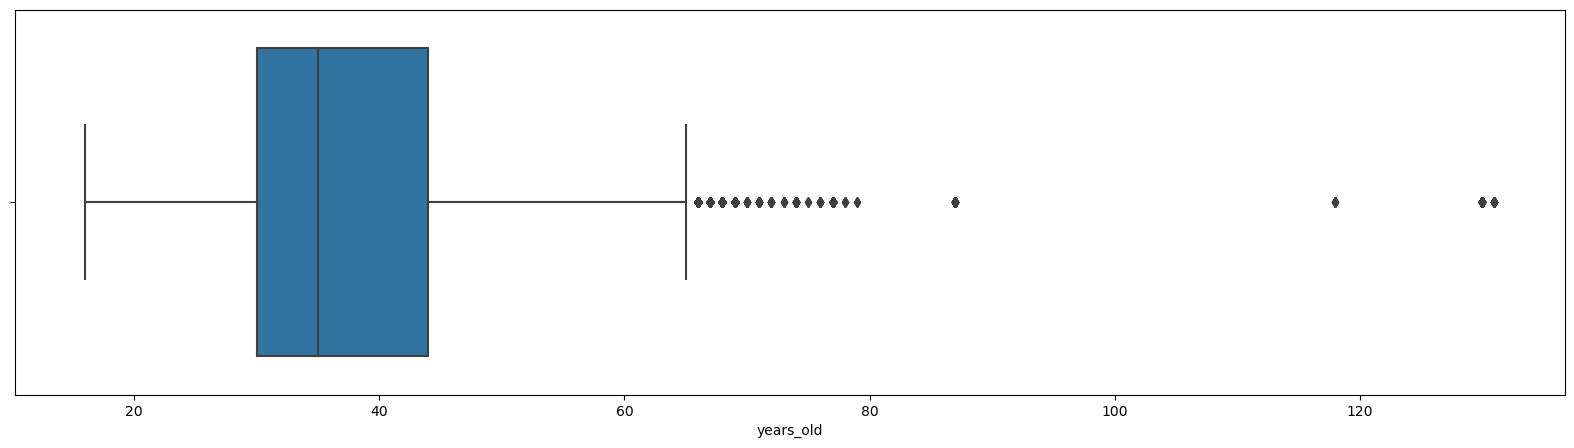

In [4]:
plt.figure(figsize = (20,5))
sns.boxplot(tripdata['years_old'])
plt.show()

In [5]:
tripdata[tripdata['years_old'] >=80]
## We can we have 130 rows outliers whose age is more than 90 years, we will be dropping these rows

tripduration                starttime                 stoptime  \
1244             151  2018-01-18 19:24:37.824  2018-01-18 19:27:09.495   
1339             121  2018-01-25 20:43:47.184  2018-01-25 20:45:48.758   
1378             184  2018-01-28 19:08:22.979  2018-01-28 19:11:27.600   
1514             490  2018-01-03 12:09:10.920  2018-01-03 12:17:21.226   
1615             239  2018-01-08 19:42:49.684  2018-01-08 19:46:48.929   
...              ...                      ...                      ...   
299697           509  2018-10-12 15:12:21.411  2018-10-12 15:20:50.453   
299772           208  2018-10-15 15:11:46.635  2018-10-15 15:15:14.936   
299936           315  2018-10-22 13:21:18.134  2018-10-22 13:26:33.638   
303922           219  2018-10-15 08:27:18.833  2018-10-15 08:30:58.340   
318938           425  2018-11-20 18:41:27.762  2018-11-20 18:48:33.497   

        start station id start station name  start station latitude  \
1244                3185          City Hall               40.717732   
1339                3185          City Hall               40.717732   
1378                3185          City Hall               40.717732   
1514                3186      Grove St PATH               40.719586   
1615                3186      Grove St PATH               40.719586   
...                  ...                ...                     ...   
299697              3275     Columbus Drive               40.718355   
299772              3275     Columbus Drive               40.718355   
299936              3275     Columbus Drive               40.718355   
303922              3483      Montgomery St               40.719420   
318938              3202       Newport PATH               40.727224   

        start station longitude  end station id  end station name  \
1244                 -74.043845            3276  Marin Light Rail   
1339                 -74.043845            3276  Marin Light Rail   
1378                 -74.043845            3276  Marin Light Rail   
1514                 -74.043117            3202      Newport PATH   
1615                 -74.043117            3276  Marin Light Rail   
...                         ...             ...               ...   
299697               -74.038914            3638     Washington St   
299772               -74.038914            3638     Washington St   
299936               -74.038914            3202      Newport PATH   
303922               -74.050990            3185         City Hall   
318938               -74.033759            3203     Hamilton Park   

        end station latitude  ...  humidity  snow snowdepth  windspeed  \
1244               40.714584  ...      51.0   1.0       0.6       18.5   
1339               40.714584  ...      38.1   0.0       0.0       20.8   
1378               40.714584  ...      74.8   0.0       0.0       14.9   
1514               40.727224  ...      42.0   1.9       0.6       16.7   
1615               40.714584  ...      57.1   0.0      13.1       18.6   
...                      ...  ...       ...   ...       ...        ...   
299697             40.724294  ...      66.8   0.0       0.0       34.7   
299772             40.724294  ...      85.2   0.0       0.0       25.5   
299936             40.727224  ...      59.1   0.0       0.0       20.4   
303922             40.717732  ...      85.2   0.0       0.0       25.5   
318938             40.727596  ...      72.1   0.0       0.0       28.8   

        visibility  solarradiation  cloudcover                    conditions  \
1244          16.0           119.1         3.9                         Clear   
1339          16.0           130.8         5.8                         Clear   
1378          14.4            26.2        83.5        Rain, Partially cloudy   
1514          16.0            91.3         5.3                         Clear   
1615          15.7            49.0        75.3  Snow, Rain, Partially cloudy   
...            ...             ...         ...                      

In [6]:
tripdata.drop(tripdata[tripdata['years_old'] >=80].index, inplace=True)

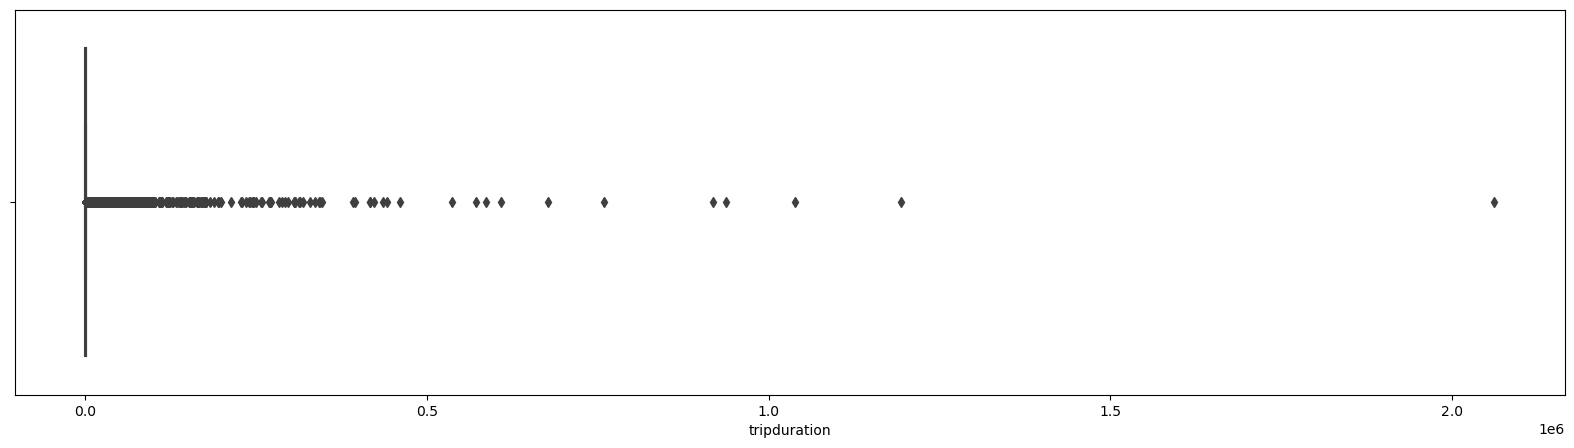

In [7]:
plt.figure(figsize = (20,5))
sns.boxplot(tripdata['tripduration'])
plt.show()

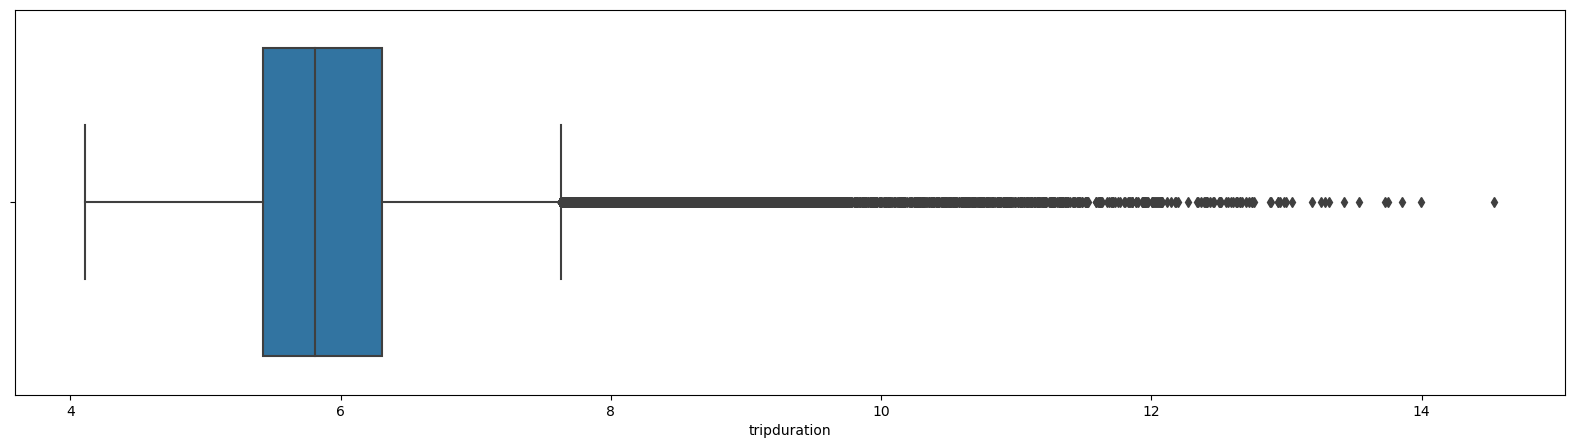

In [8]:
plt.figure(figsize = (20,5))
sns.boxplot(np.log(tripdata['tripduration']))
plt.show()

In [9]:
tripdata[tripdata['tripduration'] >=10800]['dist']
## we are dropping the trips which immpossible to accept the tripduration where they have hired it for 3 hours 
##by looking at the price and the distnace

49        0.3
190       0.8
203       0.4
1481      0.6
2208      0.0
         ... 
350964    1.0
351061    0.9
351893    0.2
352006    0.2
353255    0.3
Name: dist, Length: 932, dtype: float64

In [10]:
tripdata.drop(tripdata[tripdata['tripduration'] >=10800].index, inplace=True)

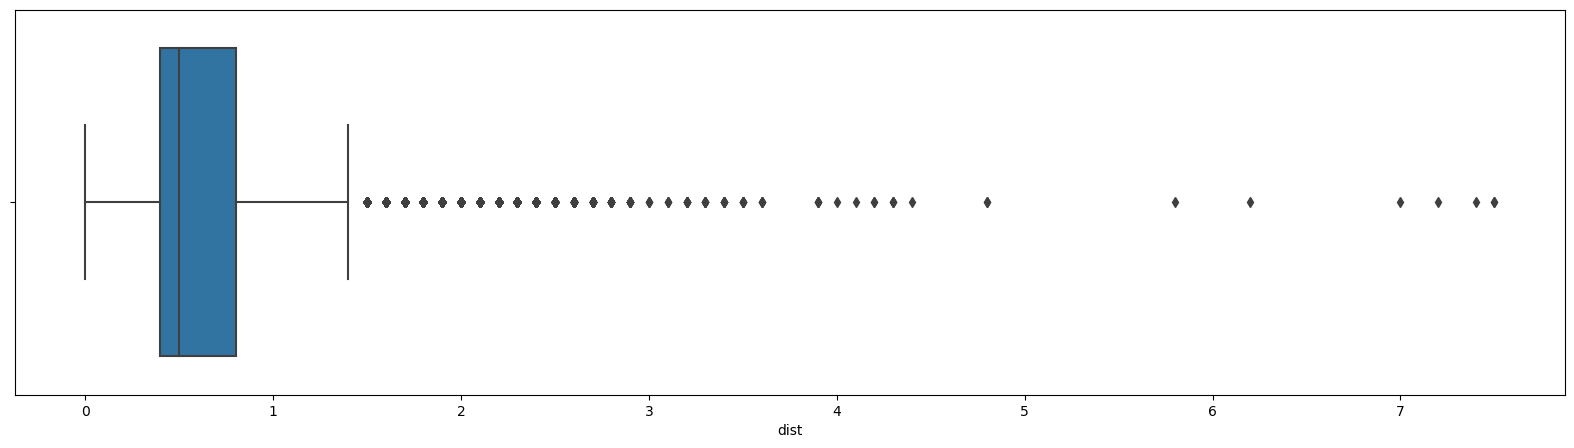

In [11]:
plt.figure(figsize = (20,5))
sns.boxplot(tripdata['dist'])
plt.show()

### Relation between age , trip duration and kind of user ridership 

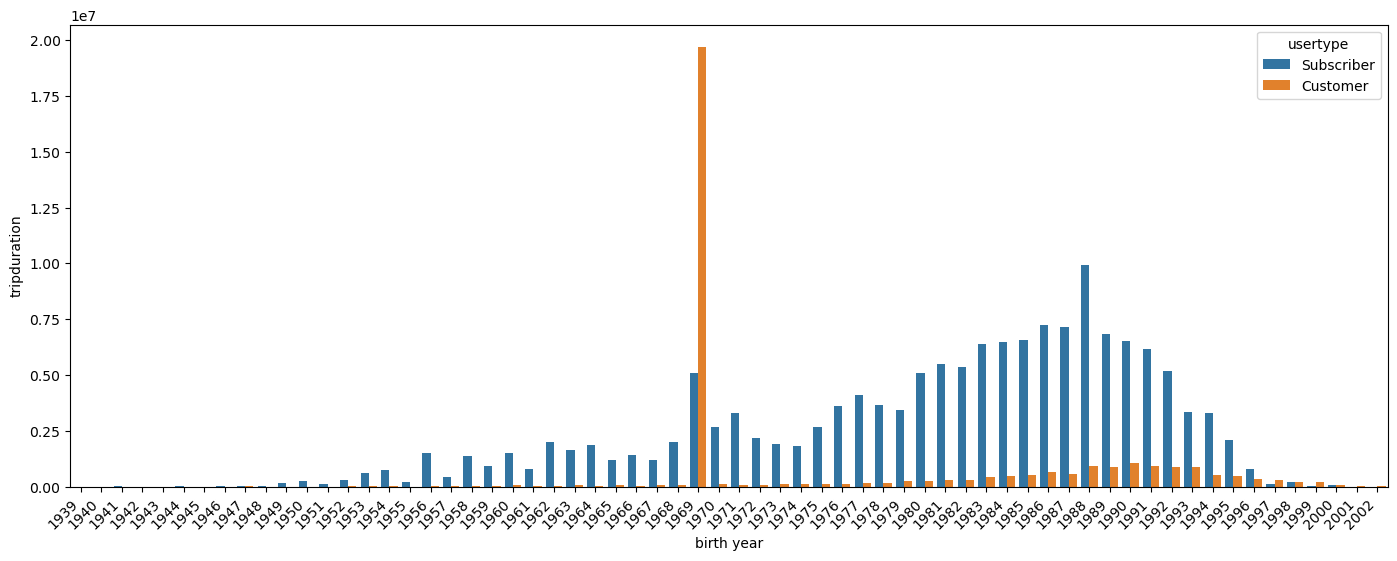

In [12]:
fig, ax = plt.subplots(figsize = (17,6))
df = tripdata.groupby(['birth year','usertype'])['tripduration'].agg('sum').reset_index()
fig = sns.barplot(data=df, x="birth year", y="tripduration", hue="usertype", ci=None, ax=ax)
bithyear = df['birth year'].sort_values().unique()
ax.set_xticklabels(labels=bithyear, rotation=45, ha='right')
plt.show()

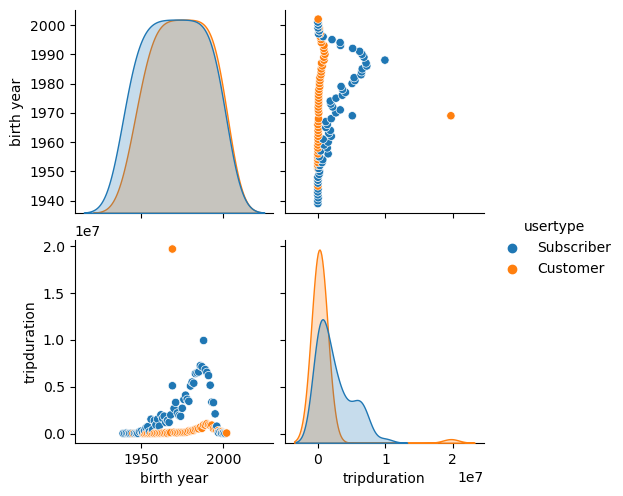

In [13]:
sns.pairplot(df, hue="usertype")

In [14]:
# tripdata['birthyear'] = pd.to_numeric(tripdata['birth year'], downcast='integer')
# tripdata['years_old'] = tripdata['year'] - tripdata['birthyear'] 
# Age_Groups = ["<20", "20-29", "30-39", "40-49", "50-59", "60-64","65+"]
# Age_Groups_Limits = [0, 20, 30, 40, 50, 60, 65, np.inf]
# Age_Min = 0
# Age_Max = 100
# tripdata["age_group"] = pd.cut(tripdata["years_old"], Age_Groups_Limits, labels=Age_Groups)

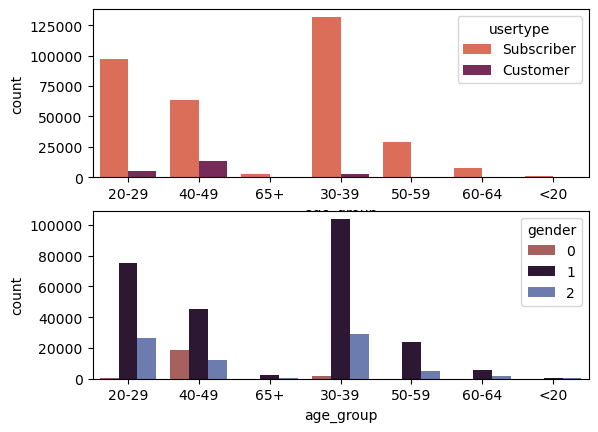

<Figure size 1700x600 with 0 Axes>

In [15]:
sns.color_palette("Set2")
fig, axes = plt.subplots(2,1)
plt.figure(figsize = (17,6))
sns.countplot(tripdata["age_group"],hue=tripdata["usertype"],palette="rocket_r",ax=axes[0])
sns.countplot(tripdata["age_group"],hue=tripdata["gender"],palette="twilight_r",ax=axes[1])
plt.show()

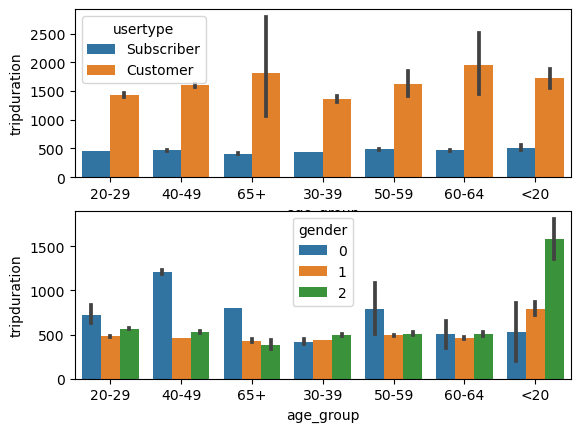

<Figure size 3000x500 with 0 Axes>

In [16]:
sns.color_palette("Set2")
fig, axes = plt.subplots(2,1)
plt.figure(figsize = (30,5))
sns.barplot(data=tripdata,x='age_group', y="tripduration" , hue="usertype" , ax=axes[0])

sns.barplot(data=tripdata,x='age_group', y="tripduration" , hue="gender" , ax=axes[1])
plt.show()

In [17]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],subplot_titles=['gender', 'usertype'])

fig.add_trace(
    go.Pie(labels=tripdata['gender'].value_counts().index, values=tripdata['gender'].value_counts(), name="gender"),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=tripdata['usertype'].value_counts().index, values=tripdata['usertype'].value_counts(), name="usertype"),
    row=1, col=2
)


fig.update_layout(title_text='Distribution of trip duration on user type and gender(1 : Male, 2 : Female, 0 : No_Gender)')
fig.show()

In [18]:
User = pd.DataFrame()
User['avg_trip duration'] = round(tripdata.groupby('usertype')['tripduration'].mean())
User = User.reset_index()
User['usertype'] = User['usertype'].astype('object')
User


usertype  avg_trip duration
0    Customer             1532.0
1  Subscriber              451.0

#### comments:
1. Overall 72% riders are male where only 21% are female
2. Nearly 94% riders are annual subscribers  where 6 % are single-ride or day pass purchasers.
3. Highest Number of subscriber are in the age group 30-39 and less in age group below 20
4. Highest number of single-ride or day pass purchasers are 40-49 rest other are very less.
5. Age group 30-39 both female and male users.
6. more number of trips durations completed who are below 20 age males and females.
7. more number of rides durations complted by age above 65 age group who are using single-ride or day pass purchasers.
8. Averge trip duration for single-ride or day pass purchasers is more than annual subscribers.

### Find out what are the Peak Bike Rides are!!!?

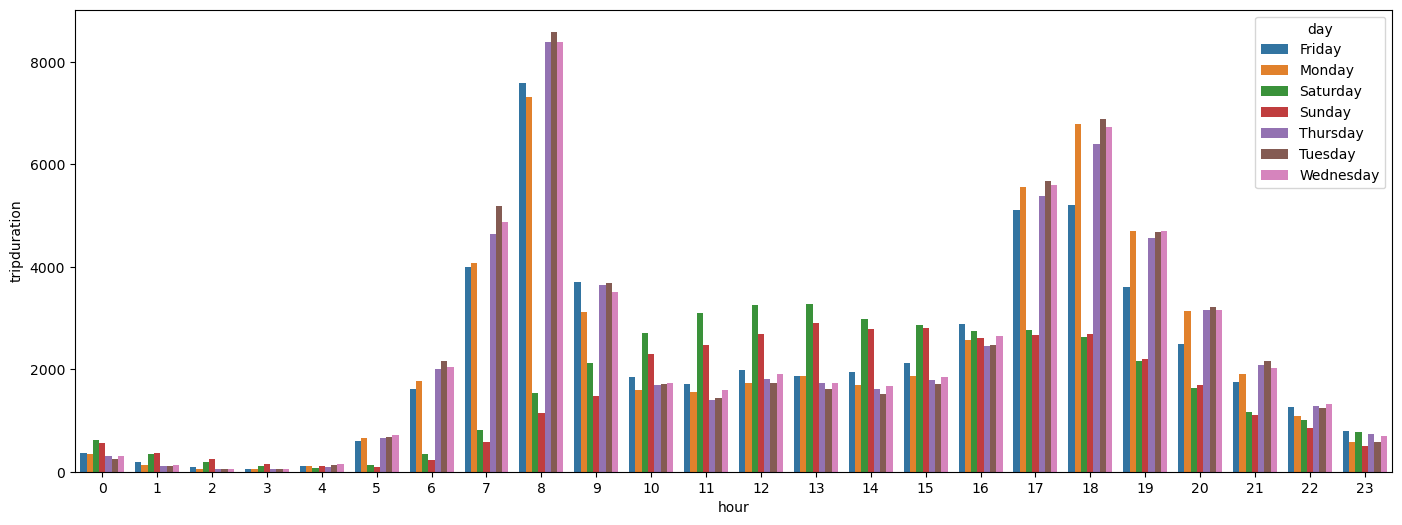

In [19]:
fig, ax = plt.subplots(figsize = (17,6))
df = tripdata.groupby(['hour','day'])['tripduration'].agg('count').reset_index()
fig = sns.barplot(data=df, x="hour", y="tripduration", hue="day", ci=None)
plt.show()

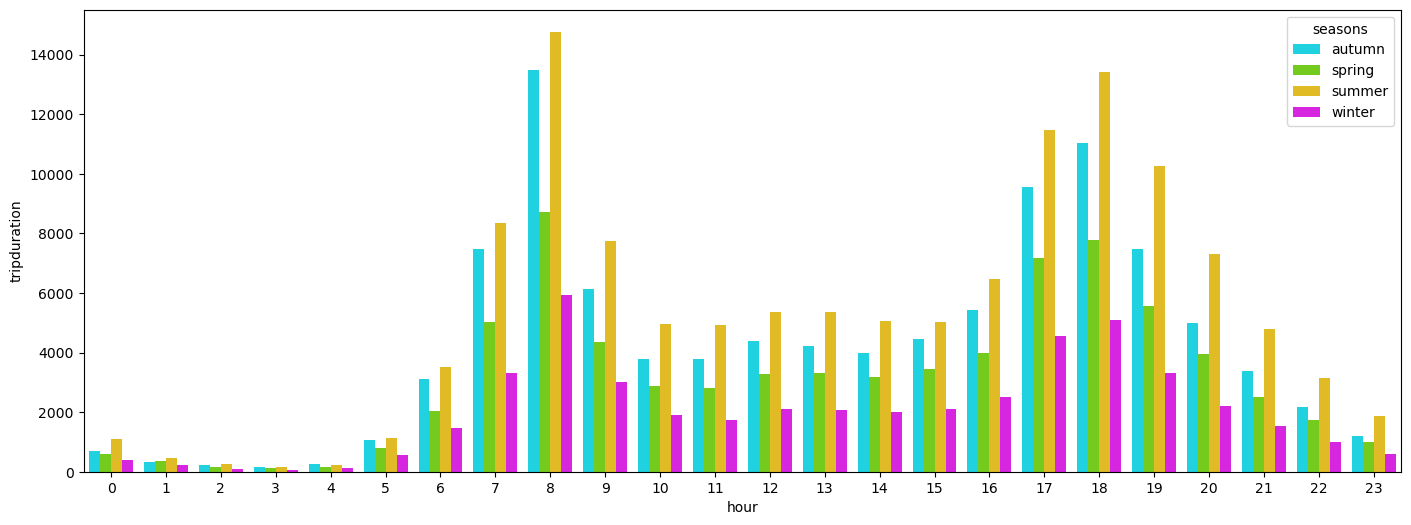

In [20]:
fig, ax = plt.subplots(figsize = (17,6))
df = tripdata.groupby(['hour','seasons'])['tripduration'].agg('count').reset_index()
fig = sns.barplot(data=df, x="hour", y="tripduration", hue="seasons", ci=None, palette="gist_ncar")
plt.show()

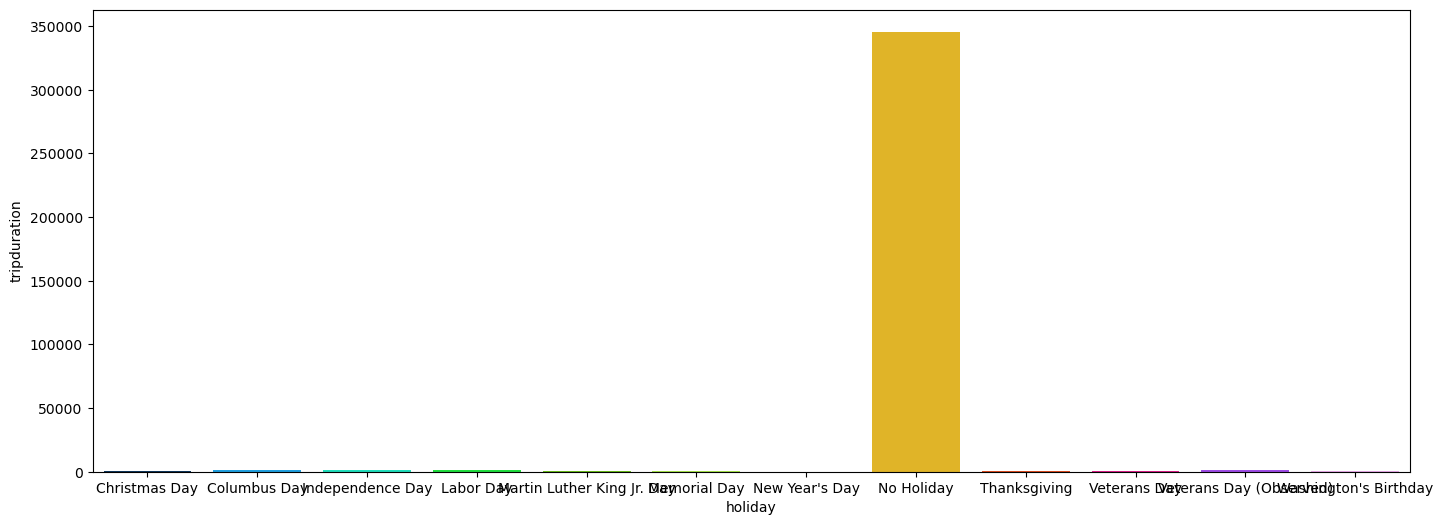

In [21]:
fig, ax = plt.subplots(figsize = (17,6))
df = tripdata.groupby(['holiday'])['tripduration'].agg('count').reset_index()
fig = sns.barplot(data=df, x="holiday", y="tripduration", ci=None, palette="gist_ncar")
plt.show()

#### Comments about peak rides
1. most of the peak hours rides starts in the morning 8am and evening 17-18 pm on weekdays
2. most of the peak hours rides starts in the morning 8am and evening 17-18 pm in summer and Autum seasons
3. Riders used bikes on working days all the time.

### Find out which stations are most famous ?

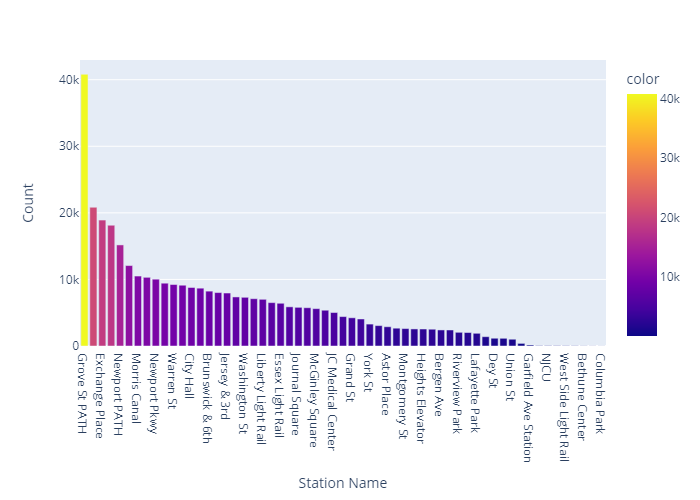

In [22]:
fig = px.bar(x=tripdata["start station name"].value_counts().index,
       y=tripdata["start station name"].value_counts().values,
       color=tripdata["start station name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"})
fig.show("png")

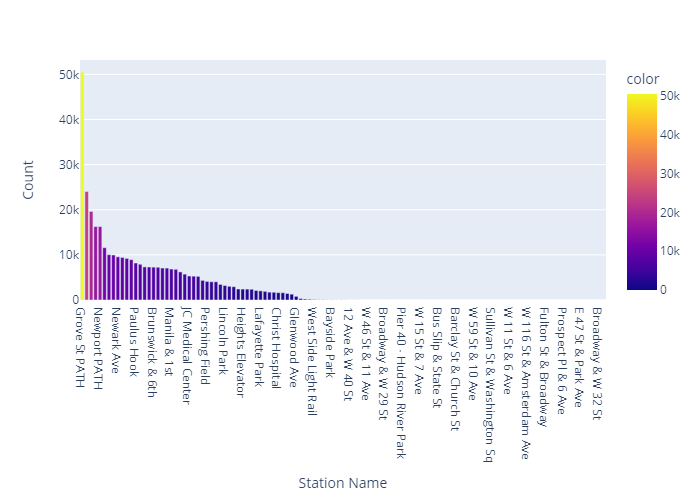

In [23]:
fig = px.bar(x=tripdata["end station name"].value_counts().index,
       y=tripdata["end station name"].value_counts().values,
       color=tripdata["end station name"].value_counts().values,
       labels={'x':'Station Name',"y":"Count"})
fig.show("png")

In [24]:
trips_df = pd.DataFrame()
trips_df = tripdata.groupby(['start station name','end station name']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips',ascending = False)
trips_df["start station name"] = trips_df["start station name"].astype(str)
trips_df["end station name"] = trips_df["end station name"].astype(str)
trips_df["Routes"] = trips_df["start station name"] + " to " + trips_df["end station name"]
trips_df = trips_df[:10]
trips_df = trips_df.reset_index()
trips_df

index start station name end station name  Number of Trips  \
0   1002      Hamilton Park    Grove St PATH             7869   
1    949      Grove St PATH    Hamilton Park             5869   
2   1924       Morris Canal   Exchange Place             4598   
3    238    Brunswick & 6th    Grove St PATH             4263   
4   1357    Jersey & 6th St    Grove St PATH             4131   
5    291       Brunswick St    Grove St PATH             3984   
6    735     Exchange Place     Morris Canal             3318   
7    607        Dixon Mills    Grove St PATH             3279   
8   1723   Marin Light Rail    Grove St PATH             3200   
9   2475     Van Vorst Park    Grove St PATH             3176   

                              Routes  
0     Hamilton Park to Grove St PATH  
1     Grove St PATH to Hamilton Park  
2     Morris Canal to Exchange Place  
3   Brunswick & 6th to Grove St PATH  
4   Jersey & 6th St to Grove St PATH  
5      Brunswick St to Grove St PATH  
6     Exchange Place to Morris Canal  
7       Dixon Mills to Grove St PATH  
8  Marin Light Rail to Grove St PATH  
9    Van Vorst Park to Grove St PATH

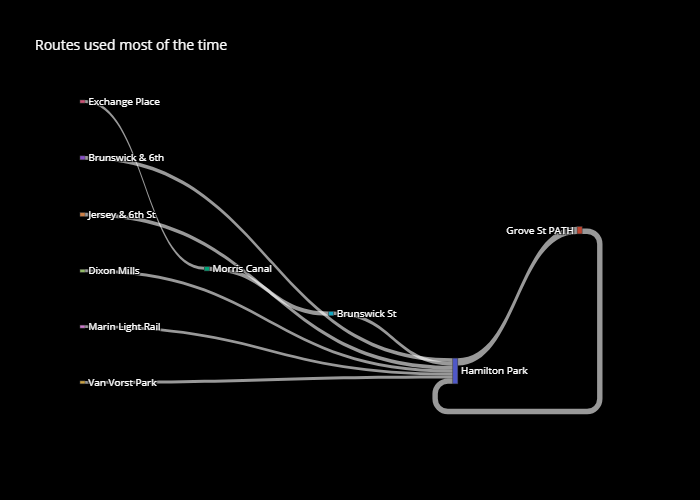

In [25]:
label = ["Hamilton Park", "Grove St PATH", "Morris Canal", "Brunswick & 6th", 
         "Jersey & 6th St", "Brunswick St", "Exchange Place", "Dixon Mills",
         "Marin Light Rail", "Van Vorst Park", "Grove St PATH", "Hamilton Park", 
         "Exchange Place", "Grove St PATH"," Grove St PATH", "Grove St PATH", 
         "Morris Canal", "Grove St PATH", "Grove St PATH"," Grove St PATH"]

source = [0,1,2,3,4,5,6,7,8,9]
target = [1, 0, 5, 0, 0, 0, 2, 0, 0, 0 ]
value = [7874, 5871, 4604, 4265, 4135, 3989, 3319, 3280, 3216, 3177]

link = dict(source = source, target = target, value = value)
node = dict(label = label, pad=50, thickness=5)
data = go.Sankey(link = link, node=node)



fig = go.Figure(data)
fig.update_layout(
    
    title="Routes used most of the time",
    font=dict(size = 10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)
fig.show("png")

In [26]:
df_sub = tripdata[['start station name','end station name', 'start station latitude','start station longitude','end station latitude','end station longitude']]
df_sub['both'] = df_sub['start station name'] + ', ' + df_sub['end station name']
df_sub = df_sub.groupby(['start station name','end station name', 'start station latitude','start station longitude','end station latitude','end station longitude'])['both'].count().reset_index(name='Counts of trips')

df_sub = df_sub.nsmallest(100, columns=['Counts of trips'])
df_sub.head()

start station name         end station name  start station latitude  \
9   5 Corners Library  Communipaw & Berry Lane               40.734961   
50        Astor Place          6 Ave & W 33 St               40.719282   
53        Astor Place    Barrow St & Hudson St               40.719282   
55        Astor Place    Broadway & Battery Pl               40.719282   
56        Astor Place       Broadway & W 32 St               40.719282   

    start station longitude  end station latitude  end station longitude  \
9                -74.059503             40.714358             -74.066611   
50               -74.071262             40.749013             -73.988484   
53               -74.071262             40.731724             -74.006744   
55               -74.071262             40.704633             -74.013617   
56               -74.071262             40.748549             -73.988084   

    Counts of trips  
9                 1  
50                1  
53                1  
55                1  
56                1

In [27]:
map1 = folium.Map(

    location=[40.732775,-74.105973],
    tiles='cartodbpositron',
    zoom_start= 15,
    max_width= 150, max_height=150

)


df_sub.apply(lambda row:folium.CircleMarker(location=[row["end station latitude"], row["end station longitude"]], popup=row["end station name"],radius=5, color="Black").add_to(map1), axis=1)
df_sub.apply(lambda row:folium.CircleMarker(location=[row["start station latitude"], row["start station longitude"]],popup=row["start station name"]).add_to(map1), axis=1)

map1

### comments on famous stations:
1. Grove St Path is the most used station than other stations and some of the stations no single trip is being recorded
2. Grove St PATH is the most popular route where end and start rides taken place.

### Which bikes are used most?

In [28]:
bike_use_df = pd.DataFrame()
bike_use_df = tripdata.groupby(['bikeid']).size().reset_index(name = 'Number of Times Used')
bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = False)
bike_use_df = bike_use_df[:10]
bike_use_df['bikeid'] = bike_use_df['bikeid'].astype(str)
bike_use_df['bikeid'] = ('Bike ' + bike_use_df['bikeid'])
bike_use_df = bike_use_df.reset_index()
bike_use_df.head()

index      bikeid  Number of Times Used
0     71  Bike 26155                   870
1    201  Bike 26288                   852
2    518  Bike 29586                   840
3    530  Bike 29598                   831
4    540  Bike 29608                   828

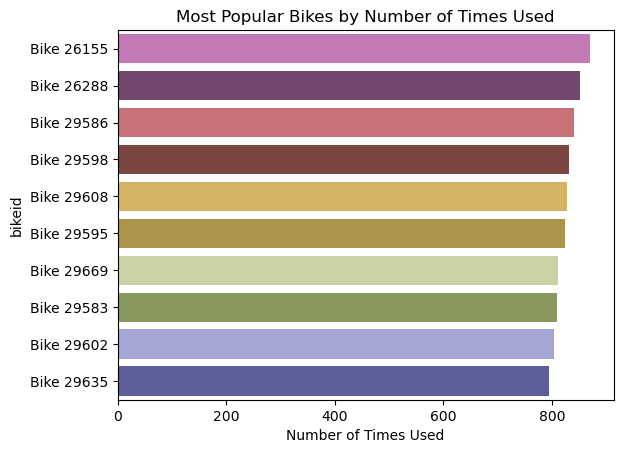

In [29]:
ax8 = sns.barplot('Number of Times Used', 'bikeid',data = bike_use_df, palette="tab20b_r")
ax8.set_title('Most Popular Bikes by Number of Times Used')
plt.show()

### How weather affecting the rides?

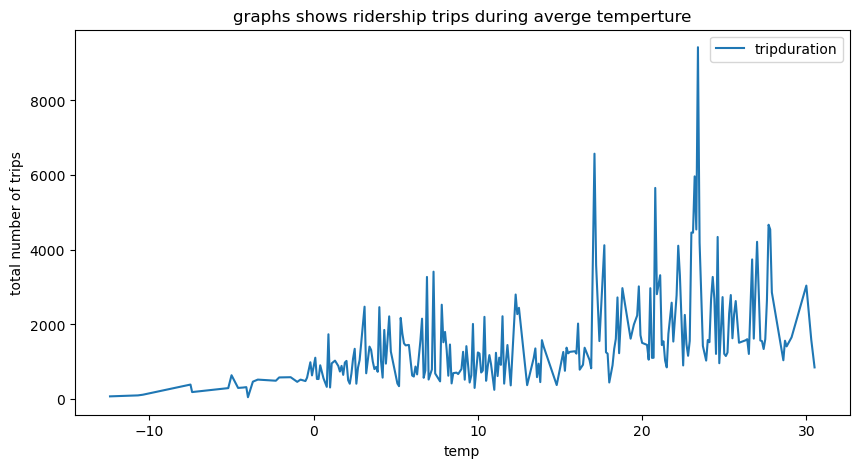

In [30]:
df = tripdata.groupby(['temp'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='temp', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during averge temperture')
ax.set(xlabel='temp', ylabel='total number of trips')
plt.show()          

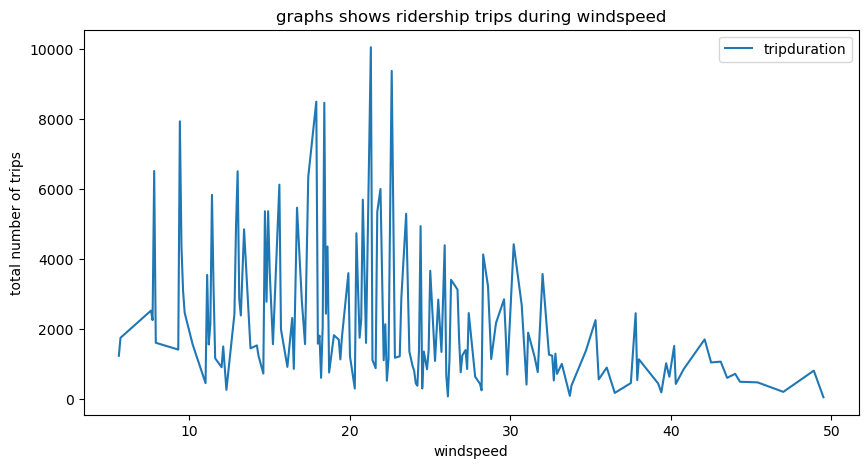

In [31]:
df = tripdata.groupby(['windspeed'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='windspeed', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during windspeed')
ax.set(xlabel='windspeed', ylabel='total number of trips')
plt.show()    

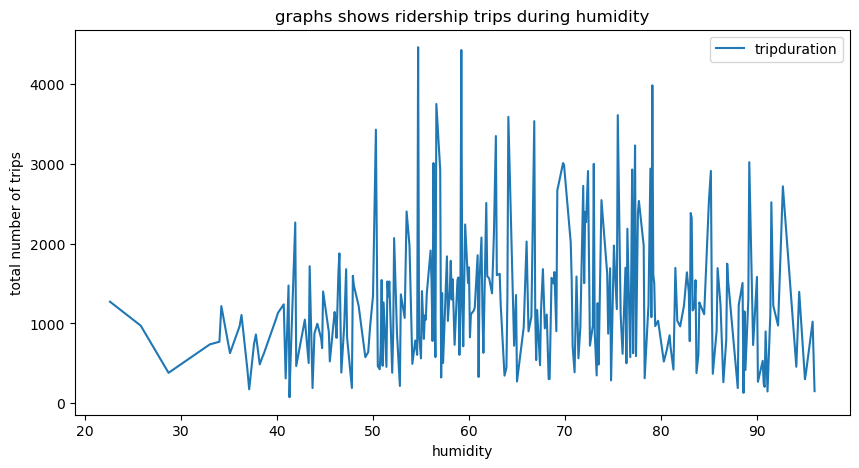

In [32]:
df = tripdata.groupby(['humidity'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='humidity', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during humidity')
ax.set(xlabel='humidity', ylabel='total number of trips')
plt.show()      

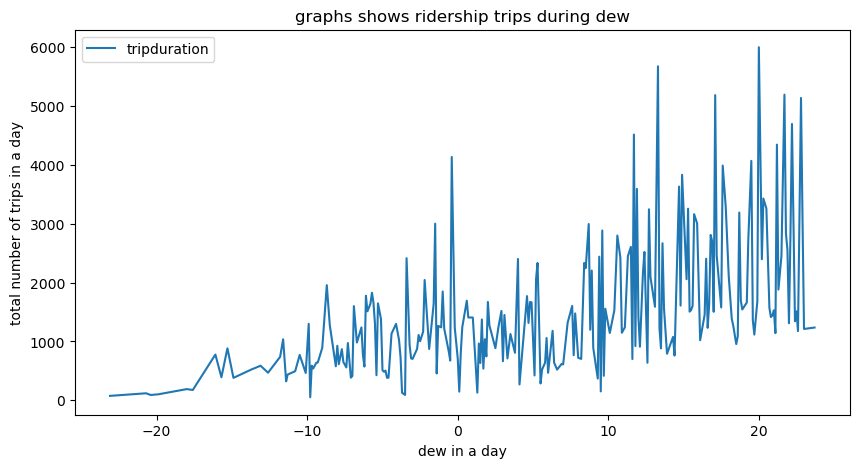

In [33]:
df = tripdata.groupby(['dew'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='dew', y='tripduration',figsize=(10,5),title='graphs shows ridership trips during dew')
plt.xlabel("dew in a day")
plt.ylabel('total number of trips in a day');  

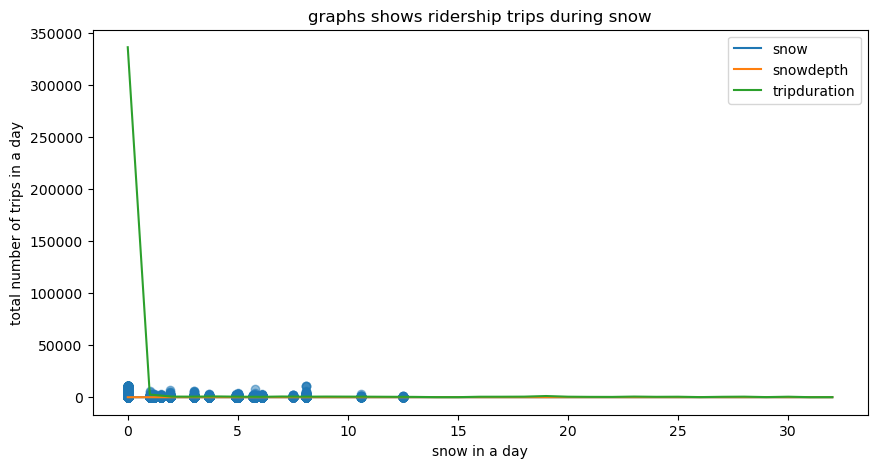

In [34]:
df = tripdata.groupby(['snow','snowdepth'])['tripduration'].agg('count').reset_index()
df
ax = df.plot(figsize=(10,5),title='graphs shows ridership trips during snow')
plt.scatter(tripdata['snow'], tripdata['tripduration'], alpha=0.5, cmap='viridis')
plt.xlabel("snow in a day")
plt.ylabel('total number of trips in a day');

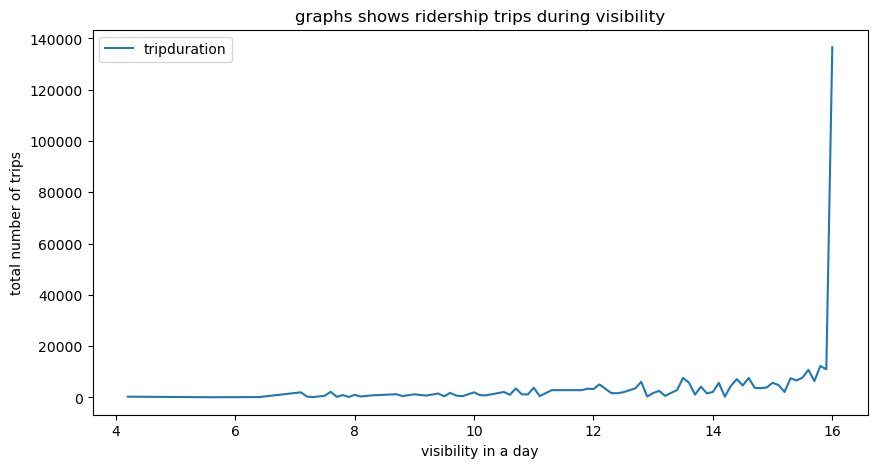

In [35]:
df = tripdata.groupby(['visibility'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='visibility' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during visibility')
plt.xlabel("visibility in a day")
plt.ylabel('total number of trips'); 

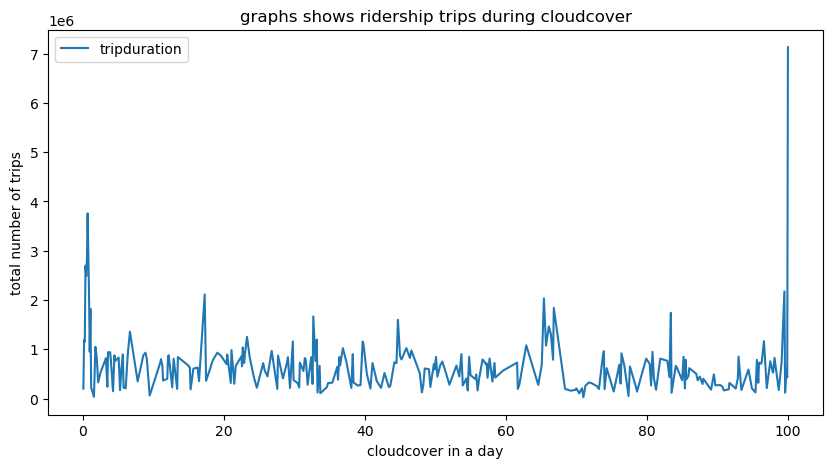

In [36]:
df = tripdata.groupby(['cloudcover'])['tripduration'].agg('sum').reset_index()
ax = df.plot(x='cloudcover' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during cloudcover')
plt.xlabel("cloudcover in a day")
plt.ylabel('total number of trips');  

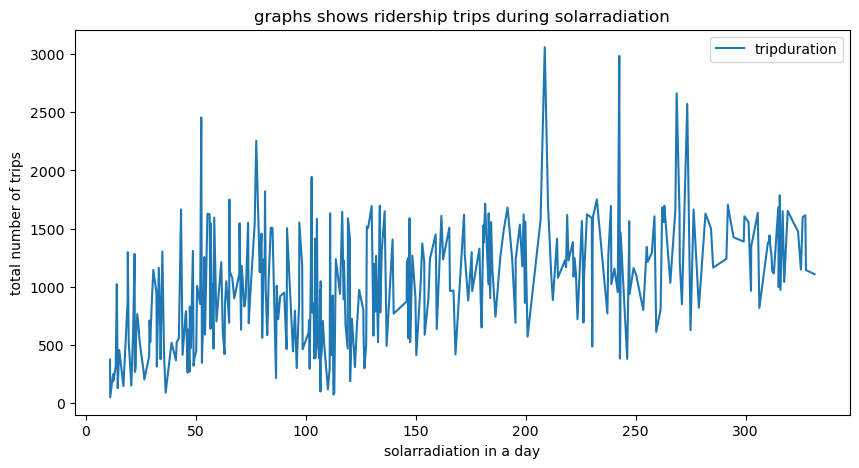

In [37]:
df = tripdata.groupby(['solarradiation'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='solarradiation' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during solarradiation')
plt.xlabel("solarradiation in a day")
plt.ylabel('total number of trips');  

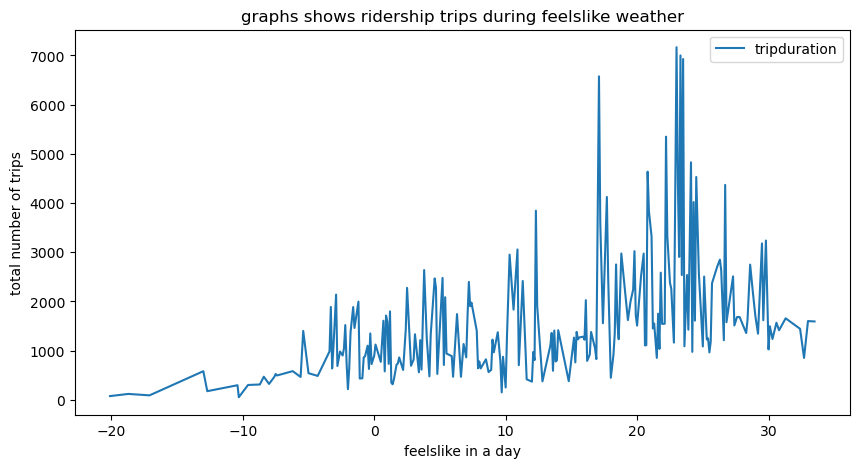

In [38]:
df = tripdata.groupby(['feelslike'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='feelslike' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during feelslike weather')
plt.xlabel("feelslike in a day")
plt.ylabel('total number of trips');  

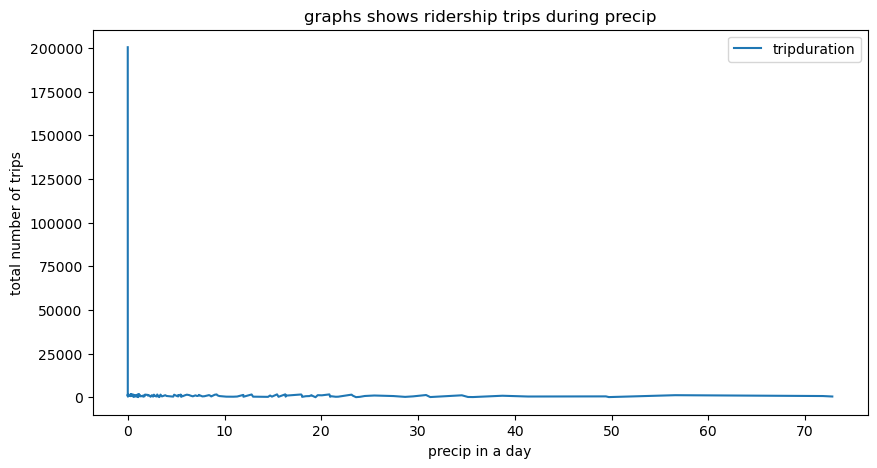

In [39]:
df = tripdata.groupby(['precip'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='precip' ,y='tripduration',figsize=(10,5),title='graphs shows ridership trips during precip')
plt.xlabel("precip in a day")
plt.ylabel('total number of trips');  

<AxesSubplot:xlabel='tripduration', ylabel='conditions'>

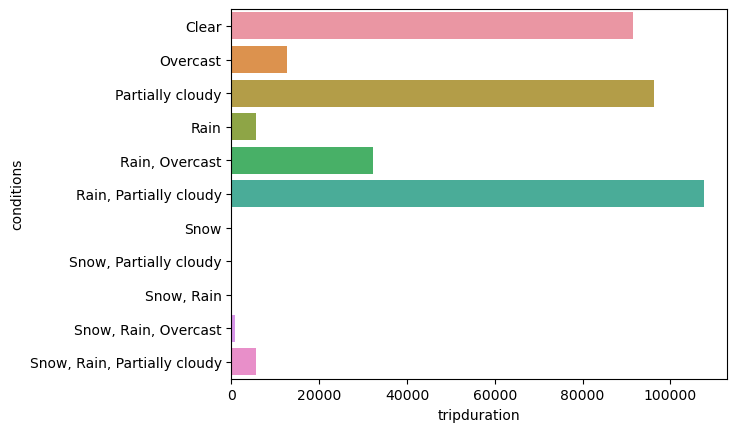

In [40]:
df = tripdata.groupby(['conditions'])['tripduration'].agg('count').reset_index()
plt.xlabel("weather conditions in a day")
plt.ylabel('total number of trips in a day');  
sns.barplot(data=df,x='tripduration', y="conditions")

#### comments on weather data and number of trips reported.

1. When the average temperature in between 20-27 the number of trips are more when avaerge temperture is below zero the trips almost nill.
2. Windspeed and tripduration negitively correlated, when it's below 28mph then higher number of rides are reported.
3. When humidity is between 50-78 % rh repoted good amount of trips.
4. As dew increases trips also incraesing.
5. When there is no snow we have more number of riders than when snow/snow depth reported.
6. Visibilty between 15-16 we have peaks in the trips otherwise the trips are almost Nill.
7. Cloudcover didn't give much value for tripduration but oscilate between 0-100 (when it's 0 and 100 has highest number of rides)
8. When the weather is clear, partly cloud and expected rain has more number of rides reported.


### Check some correlation between the features and target variable tripduration 

In [41]:
df = tripdata.drop(columns=['year'], axis=1)
df.head(3)

tripduration                starttime                 stoptime  \
0           932  2018-01-01 02:06:17.541  2018-01-01 02:21:50.027   
1           550  2018-01-01 12:06:18.039  2018-01-01 12:15:28.443   
2           510  2018-01-01 12:06:56.978  2018-01-01 12:15:27.810   

   start station id start station name  start station latitude  \
0              3183     Exchange Place               40.716247   
1              3183     Exchange Place               40.716247   
2              3183     Exchange Place               40.716247   

   start station longitude  end station id end station name  \
0               -74.033459            3199     Newport Pkwy   
1               -74.033459            3199     Newport Pkwy   
2               -74.033459            3199     Newport Pkwy   

   end station latitude  ...  humidity  snow snowdepth  windspeed  visibility  \
0             40.728745  ...      47.8   0.0       0.1       18.5        16.0   
1             40.728745  ...      47.8   0.0       0.1       18.5        16.0   
2             40.728745  ...      47.8   0.0       0.1       18.5        16.0   

   solarradiation  cloudcover conditions  \
0           106.7         0.3      Clear   
1           106.7         0.3      Clear   
2           106.7         0.3      Clear   

                            description seasons  
0  Clear conditions throughout the day.  winter  
1  Clear conditions throughout the day.  winter  
2  Clear conditions throughout the day.  winter  

[3 rows x 42 columns]

In [42]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['usertype']= label_encoder.fit_transform(df['usertype'])
df['day']= label_encoder.fit_transform(df['day'])
df['month']= label_encoder.fit_transform(df['month'])
df['holiday'] = label_encoder.fit_transform(df['holiday'])
df['conditions'] = label_encoder.fit_transform(df['conditions'])               
df['description'] = label_encoder.fit_transform(df['description'])           
df['seasons'] = label_encoder.fit_transform(df['seasons'])

In [43]:
corr = df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

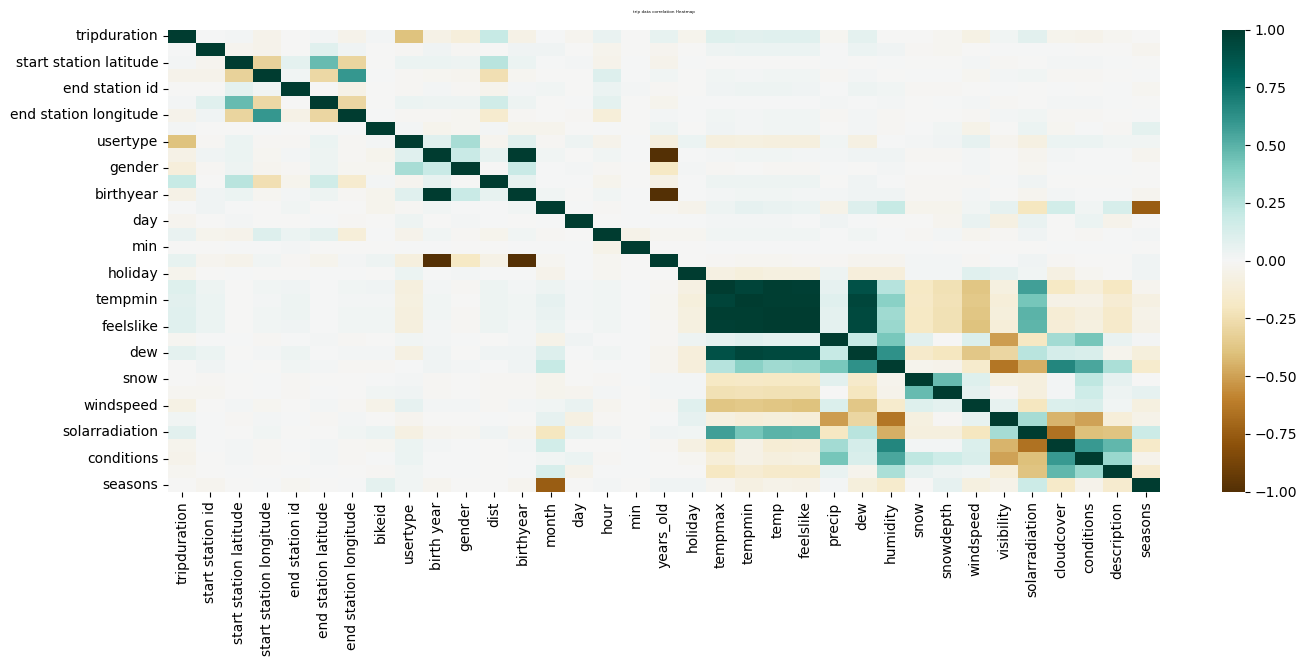

In [44]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr,vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('trip data correlation Heatmap', fontdict={'fontsize':3}, pad=12);

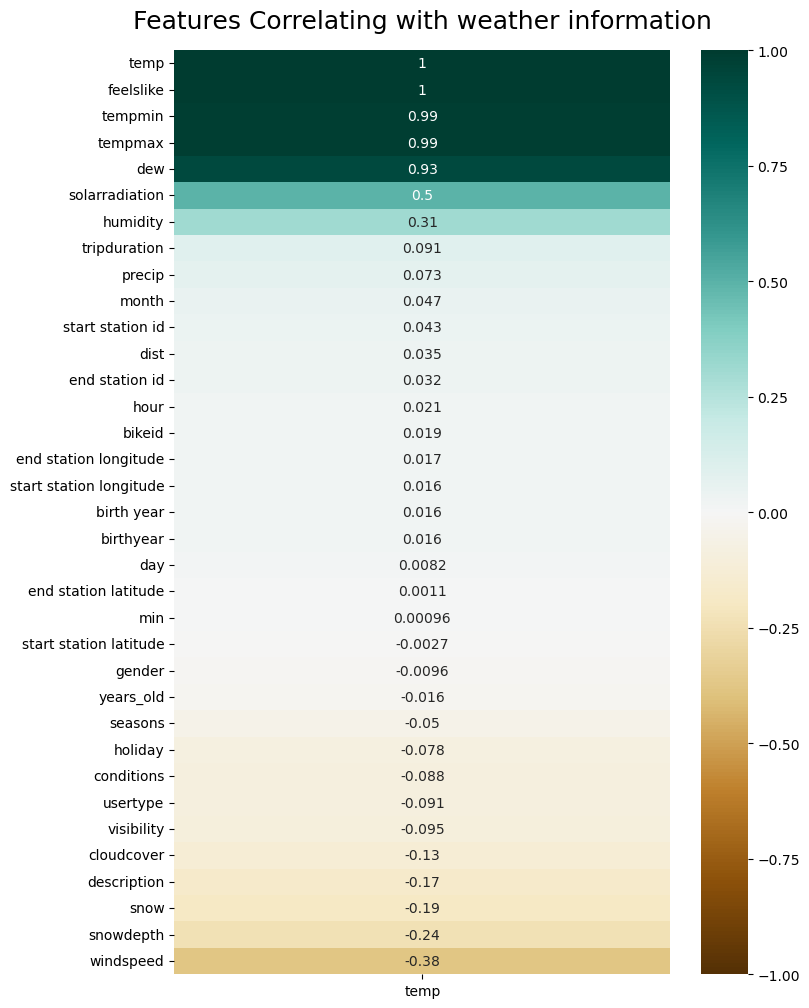

In [45]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['temp']].sort_values(by='temp', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with weather information', fontdict={'fontsize':18}, pad=16);

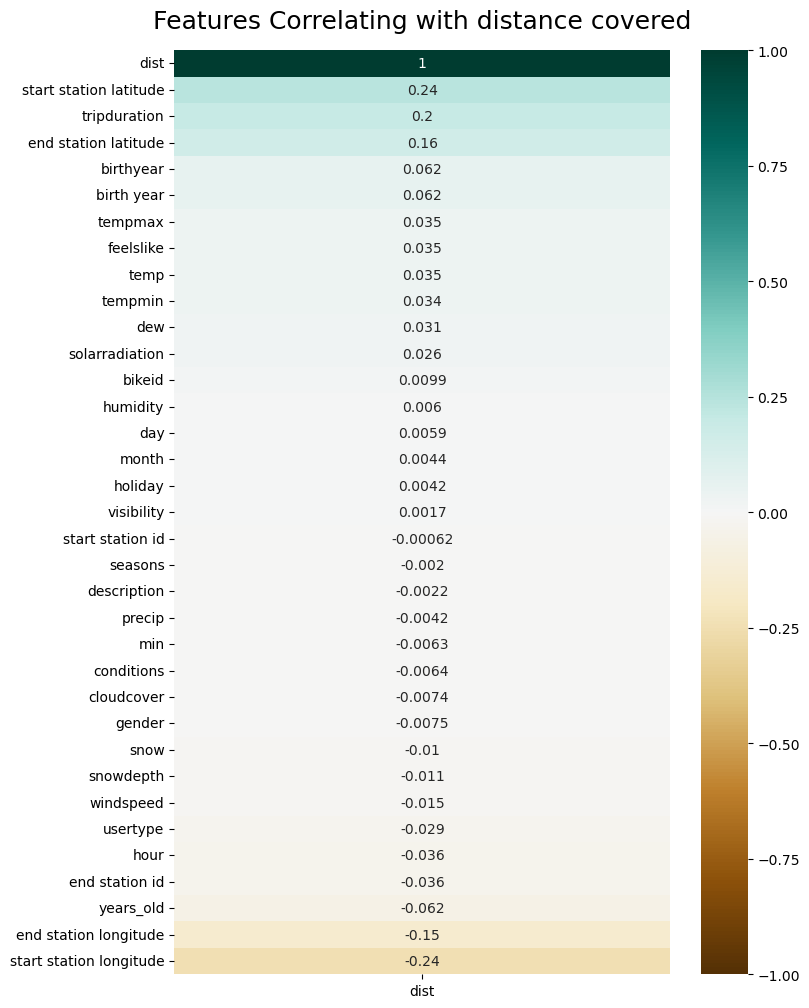

In [46]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['dist']].sort_values(by='dist', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with distance covered', fontdict={'fontsize':18}, pad=16);

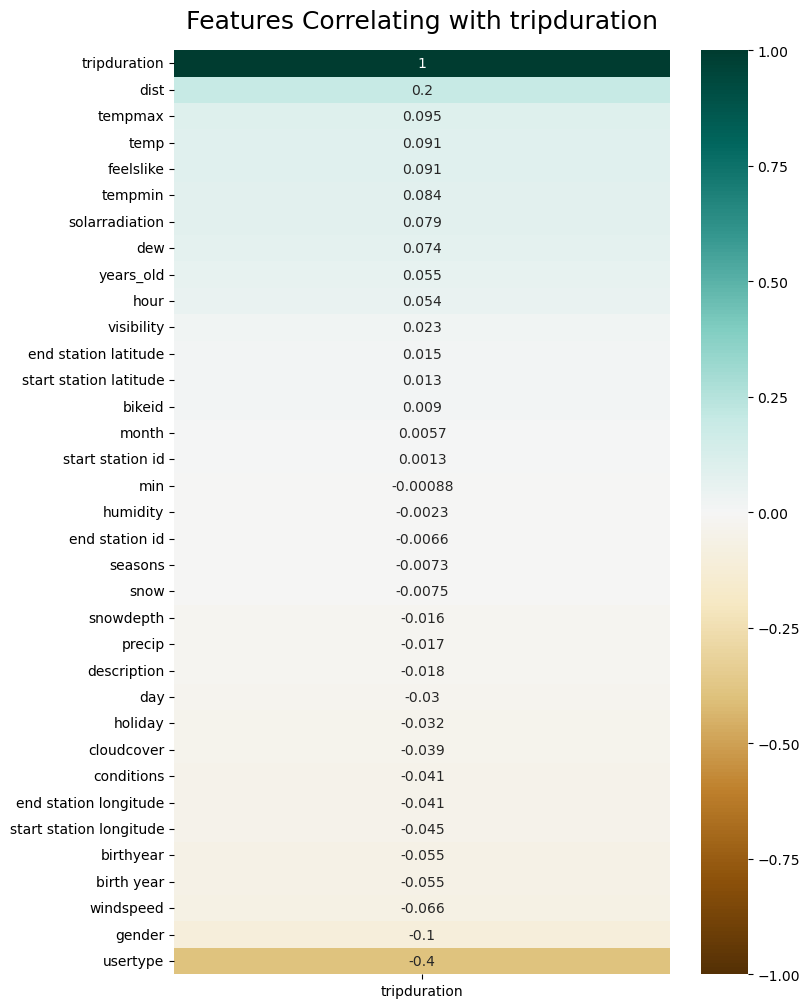

In [47]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['tripduration']].sort_values(by='tripduration', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with tripduration', fontdict={'fontsize':18}, pad=16);

In [65]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(tripdata)
categorical_features

['starttime',
 'stoptime',
 'start station name',
 'end station name',
 'usertype',
 'date',
 'month',
 'day',
 'age_group',
 'holiday',
 'datetime',
 'conditions',
 'description',
 'seasons']

In [70]:
# Import association_metrics  
import association_metrics as am
# Convert you str columns to Category columns
df = tripdata.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)
df
df1 = df.drop(['starttime','stoptime','datetime','age_group','date'], axis=1)
cramersv = am.CramersV(df1) 

cat_corr = cramersv.fit()

In [71]:
cat_corr

start station name  end station name  usertype     month  \
start station name            1.000000          0.229151  0.166834  0.048759   
end station name              0.229151          1.000000  0.183846  0.051045   
usertype                      0.166834          0.183846  1.000000  0.100671   
month                         0.048759          0.051045  0.100671  1.000000   
day                           0.052479          0.058605  0.190444  0.061467   
holiday                       0.020318          0.020033  0.077488  0.145466   
conditions                    0.020124          0.023085  0.049925  0.169793   
description                   0.017445          0.020992  0.069822  0.327539   
seasons                       0.067271          0.070073  0.075837  1.000000   

                         day   holiday  conditions  description   seasons  
start station name  0.052479  0.020318    0.020124     0.017445  0.067271  
end station name    0.058605  0.020033    0.023085     0.020992  0.070073  
usertype            0.190444  0.077488    0.049925     0.069822  0.075837  
month               0.061467  0.145466    0.169793     0.327539  1.000000  
day                 1.000000  0.139709    0.117835     0.301645  0.031598  
holiday             0.139709  1.000000    0.118699     0.299975  0.143599  
conditions          0.117835  0.118699    1.000000     0.996360  0.180712  
description         0.301645  0.299975    0.996360     1.000000  0.331750  
seasons             0.031598  0.143599    0.180712     0.331750  1.000000

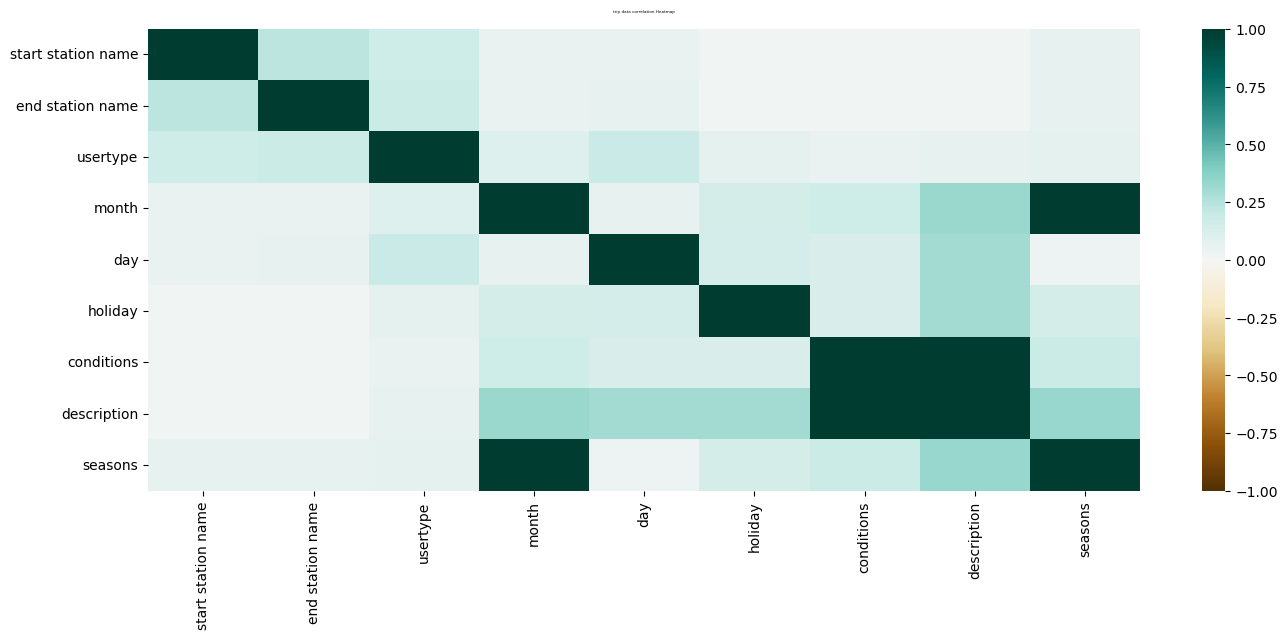

In [72]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cat_corr,vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('trip data correlation Heatmap', fontdict={'fontsize':3}, pad=12);

In [73]:
# corr = df.corr(method='pearson')
cat_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [48]:
df.var()

tripduration               4.264470e+05
start station id           1.916770e+04
start station latitude     5.253167e-05
start station longitude    1.156284e-04
end station id             2.148939e+04
end station latitude       5.016143e-05
end station longitude      1.154961e-04
bikeid                     6.400403e+06
usertype                   5.748622e-02
birth year                 1.018767e+02
gender                     2.483347e-01
dist                       1.584371e-01
birthyear                  1.018767e+02
month                      1.268610e+01
day                        4.344034e+00
hour                       2.659896e+01
min                        2.981092e+02
years_old                  1.018767e+02
holiday                    3.586629e-01
tempmax                    8.348340e+01
tempmin                    7.642739e+01
temp                       7.753999e+01
feelslike                  1.063370e+02
precip                     7.445840e+01
dew                        1.005698e+02


In [49]:
abs(df.corr()['tripduration'])

tripduration               1.000000
start station id           0.001274
start station latitude     0.012825
start station longitude    0.044569
end station id             0.006615
end station latitude       0.015318
end station longitude      0.041100
bikeid                     0.009035
usertype                   0.397018
birth year                 0.055301
gender                     0.104429
dist                       0.198688
birthyear                  0.055301
month                      0.005734
day                        0.030115
hour                       0.053703
min                        0.000885
years_old                  0.055301
holiday                    0.031863
tempmax                    0.094830
tempmin                    0.084417
temp                       0.091278
feelslike                  0.090752
precip                     0.017062
dew                        0.073610
humidity                   0.002313
snow                       0.007507
snowdepth                  0

#### comments on feature 

1. with respect to avearge temperature 
    * tempmin
	* tempmax
	* dew 
	* solarradiation
	* humidity  
has postive correaltion on the other hand 
	* windspeed
	* snowdepth
	* snow
has the negitive correaltion


2. with respect to dist travelled  
    * start station lat 
	* end station lat
	* birth year 
has postive correaltion on the other hand 
	* start station lan
	* end station lan
has the negitive correaltion

3. with respect to tripduration
	* usertype 
	* gender
has the negitive correaltion	


### Some important time series garphs 

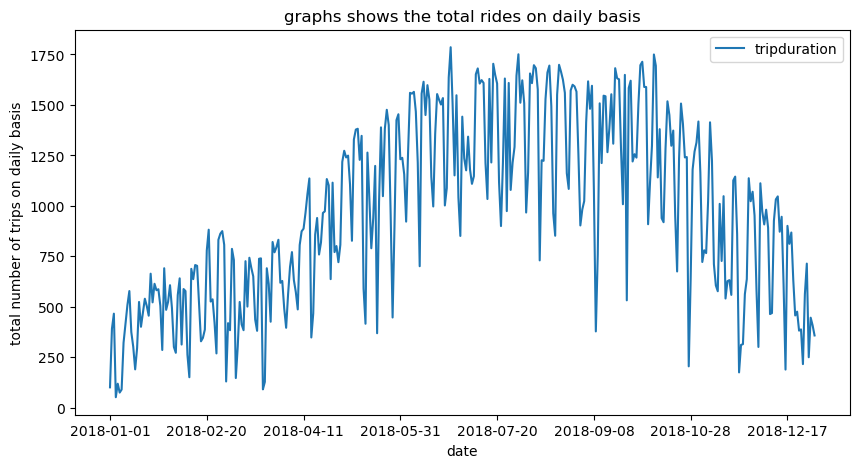

In [50]:
df = tripdata.groupby(['date'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='date', y='tripduration',figsize=(10,5),title='graphs shows the total rides on daily basis')
ax.set(xlabel='date', ylabel='total number of trips on daily basis')
plt.show()

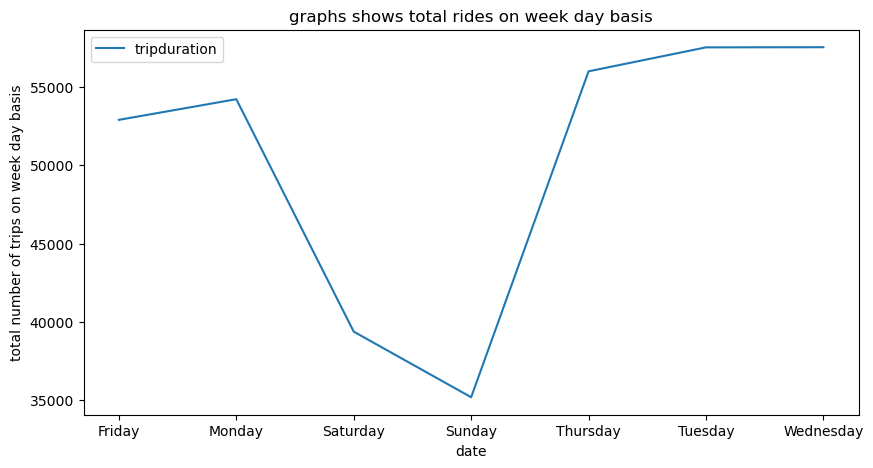

In [51]:
df = tripdata.groupby(['day'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='day', y='tripduration',figsize=(10,5),title='graphs shows total rides on week day basis')
ax.set(xlabel='date', ylabel='total number of trips on week day basis')
plt.show()

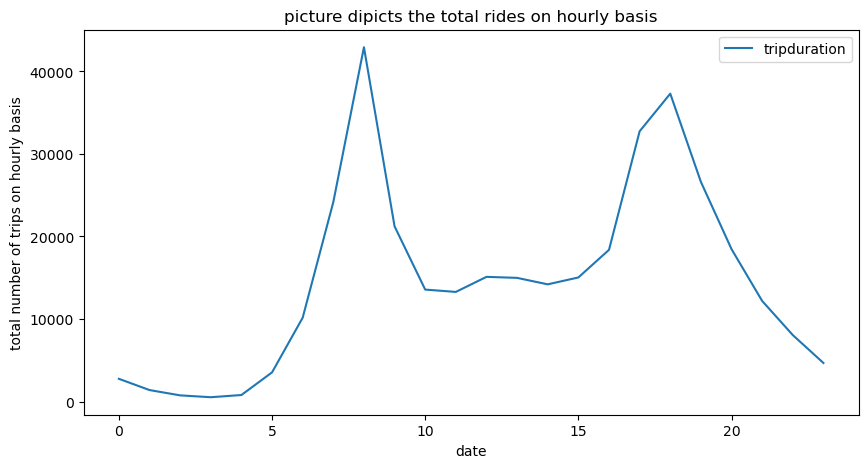

In [52]:
df = tripdata.groupby(['hour'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='hour', y='tripduration',figsize=(10,5),title='picture dipicts the total rides on hourly basis')
ax.set(xlabel='date', ylabel='total number of trips on hourly basis')
plt.show()

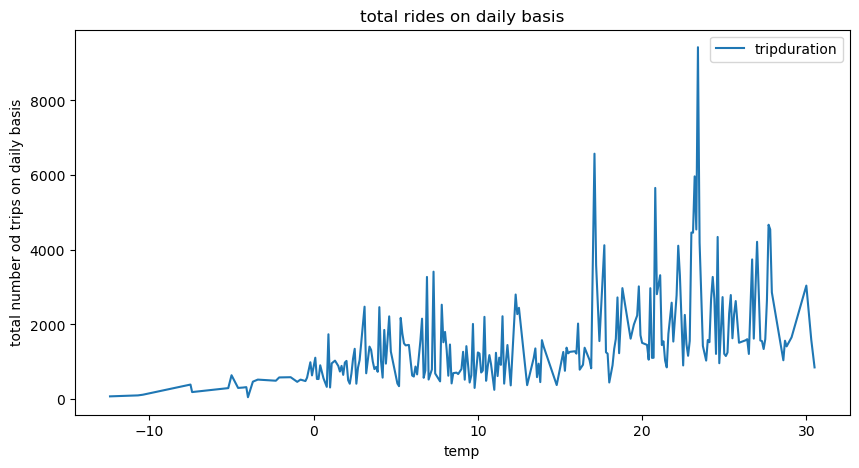

In [53]:
df = tripdata.groupby(['temp'])['tripduration'].agg('count').reset_index()
ax = df.plot(x='temp', y='tripduration',figsize=(10,5),title='total rides on daily basis')
ax.set(xlabel='temp', ylabel='total number od trips on daily basis')
plt.show()

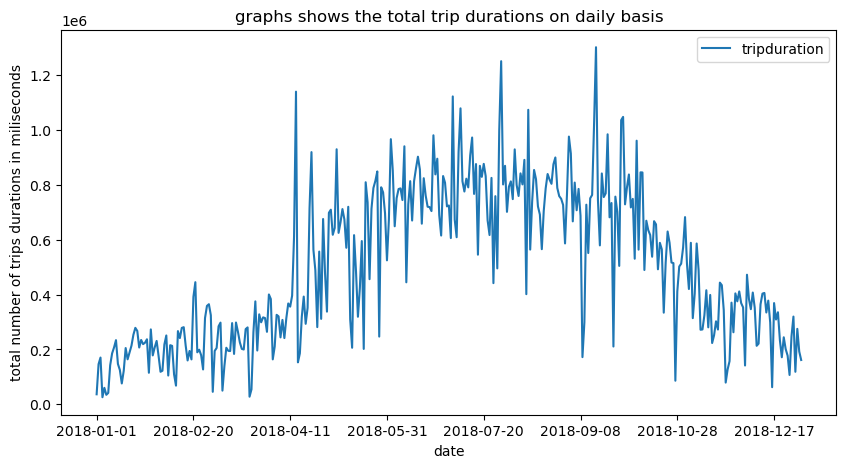

In [54]:
df = tripdata.groupby(['date'])['tripduration'].agg('sum').reset_index()
ax = df.plot(x='date', y='tripduration',figsize=(10,5),title='graphs shows the total trip durations on daily basis')
ax.set(xlabel='date', ylabel='total number of trips durations in miliseconds')
plt.show()


### Numerical values distplots

In [55]:
#assign the numerical coulmn to variavle
numerical_columns=list(tripdata.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['tripduration', 'start station id', 'start station latitude',
       'start station longitude', 'end station id', 'end station latitude',
       'end station longitude', 'bikeid', 'birth year', 'gender', 'dist',
       'birthyear', 'hour', 'min', 'year', 'years_old', 'tempmax', 'tempmin',
       'temp', 'feelslike', 'precip', 'dew', 'humidity', 'snow', 'snowdepth',
       'windspeed', 'visibility', 'solarradiation', 'cloudcover'],
      dtype='object')

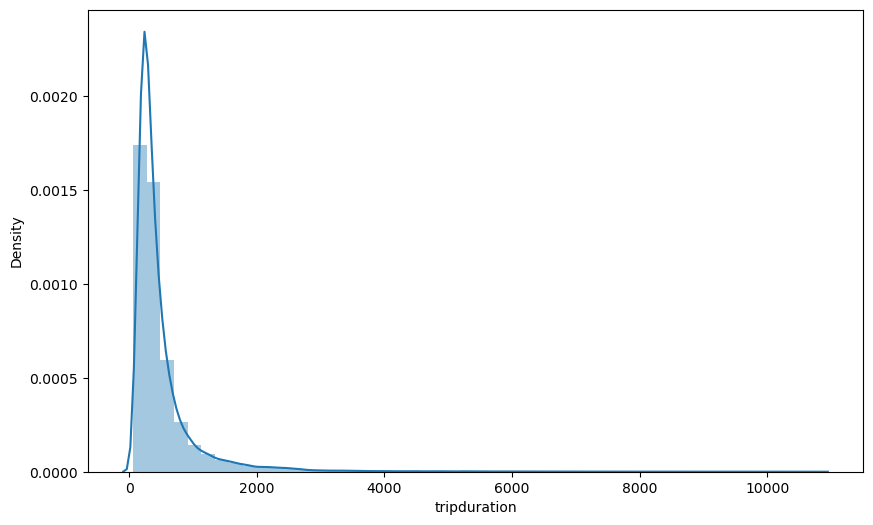

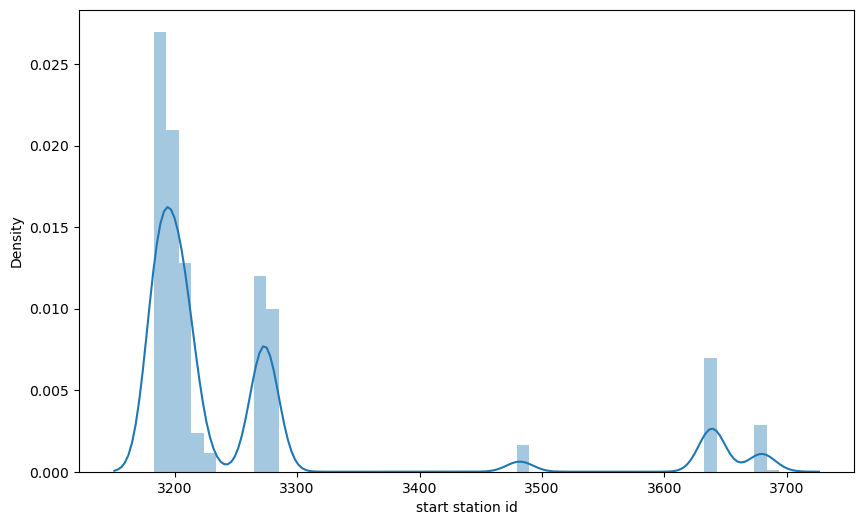

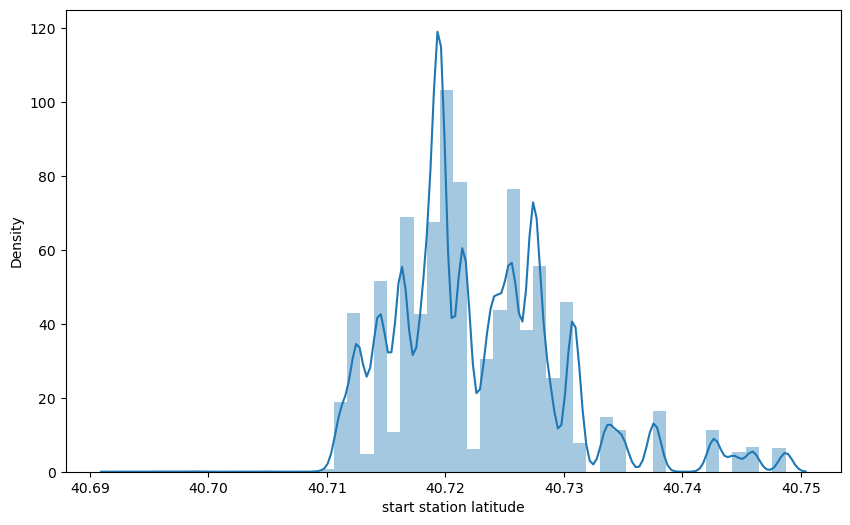

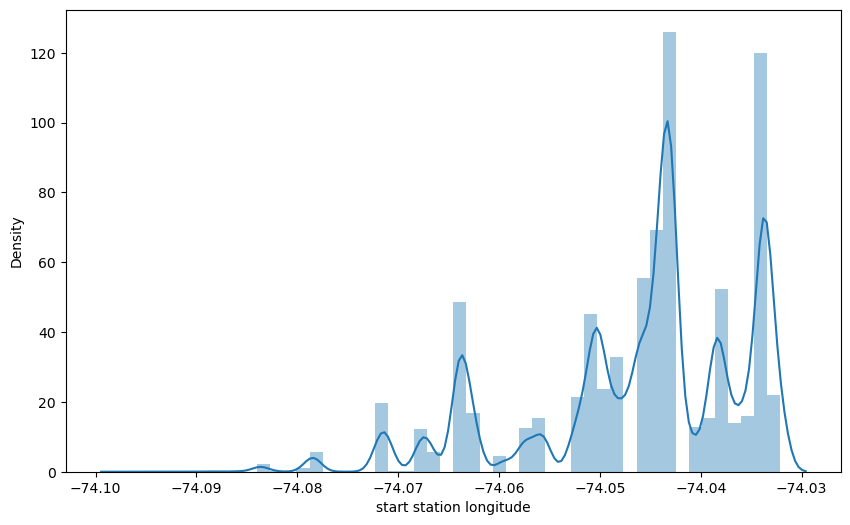

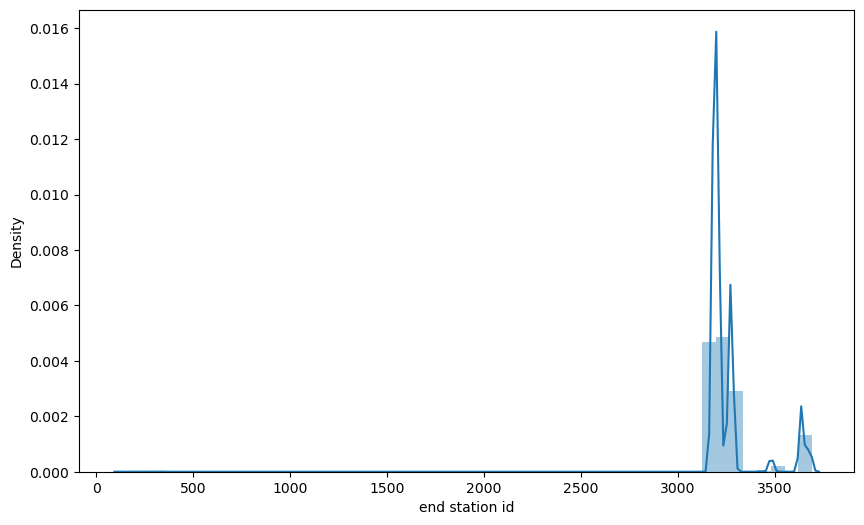

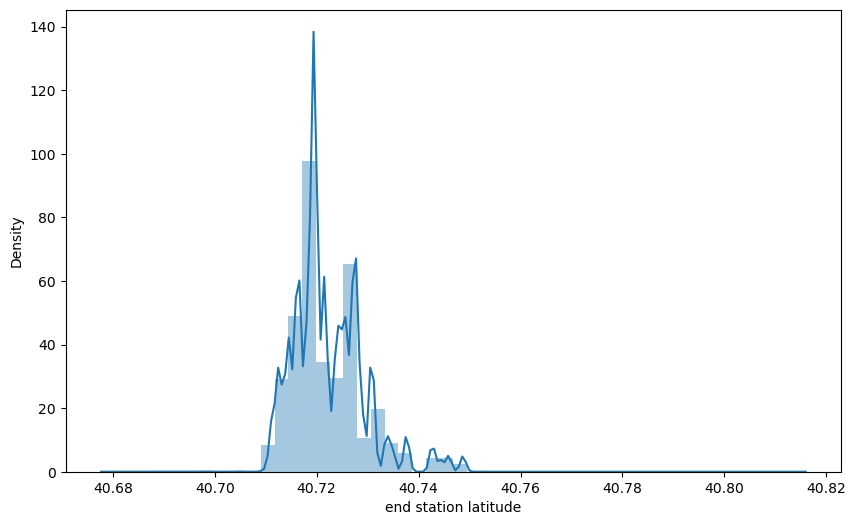

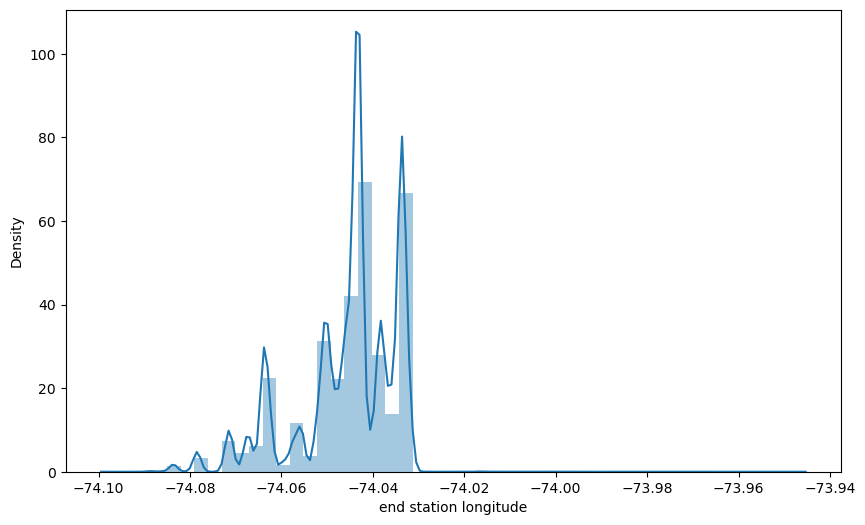

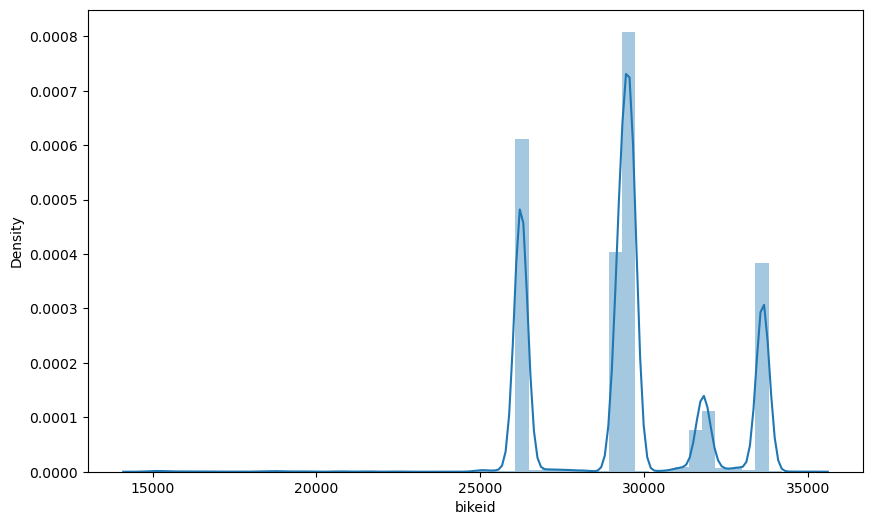

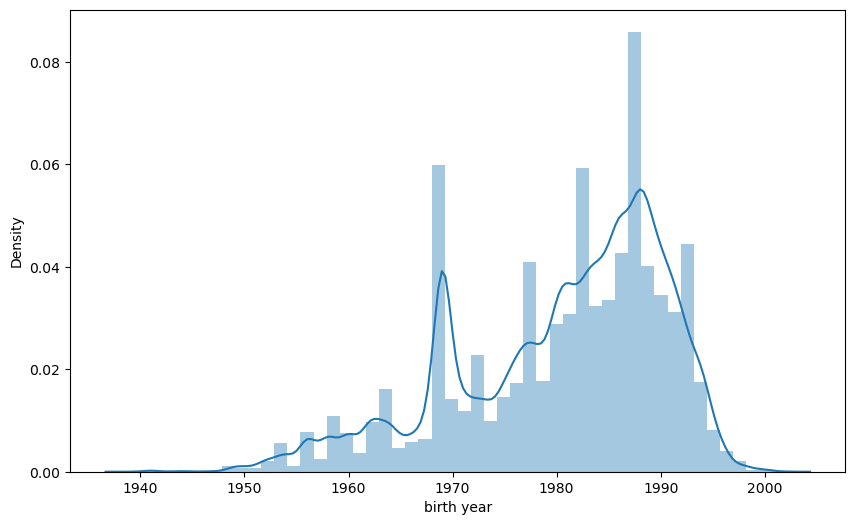

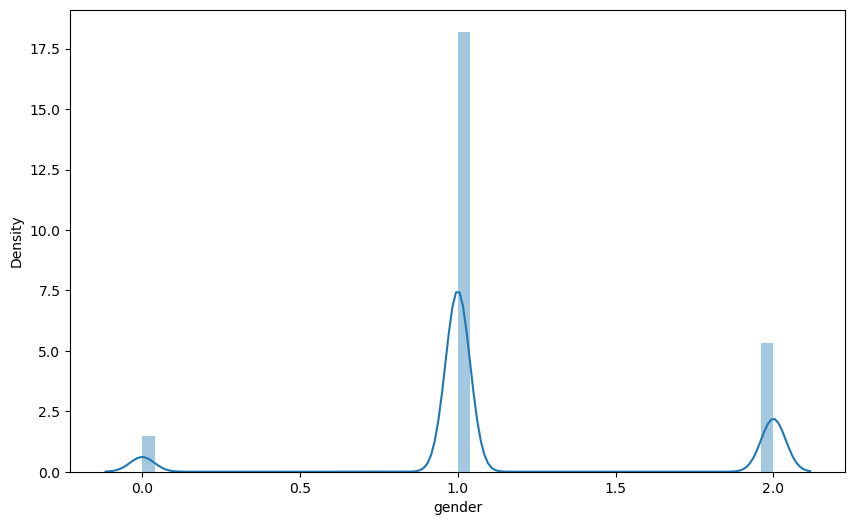

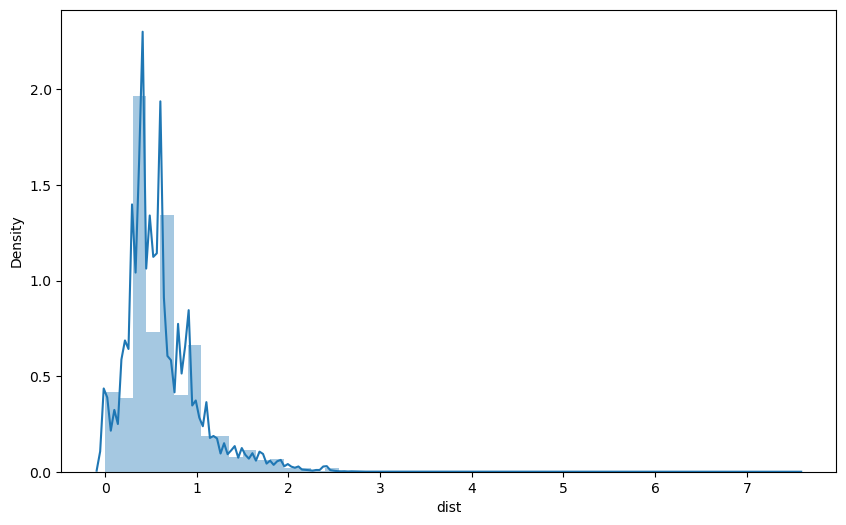

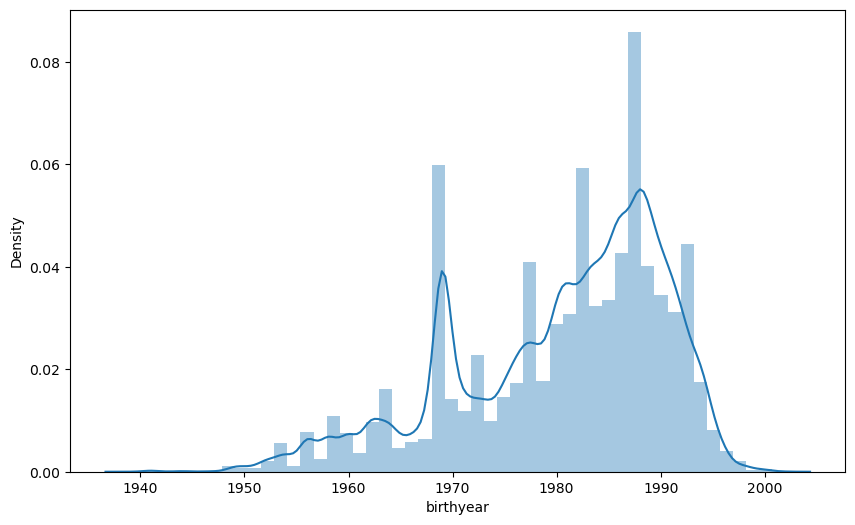

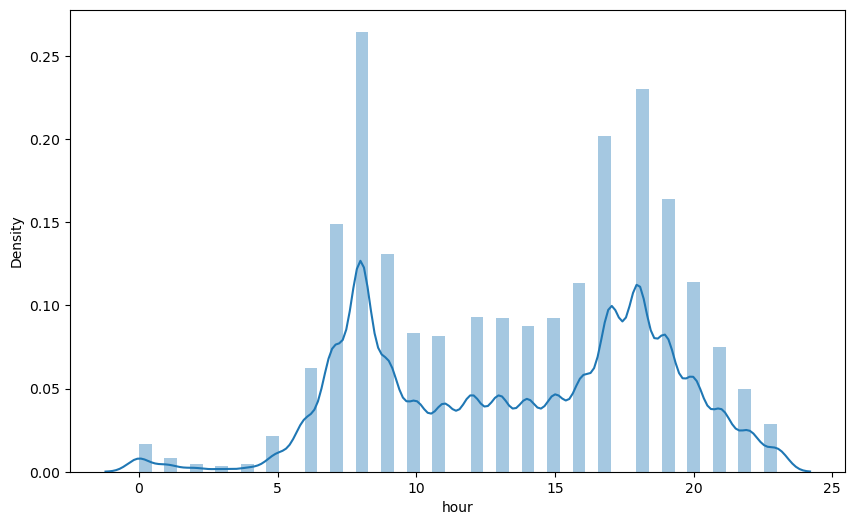

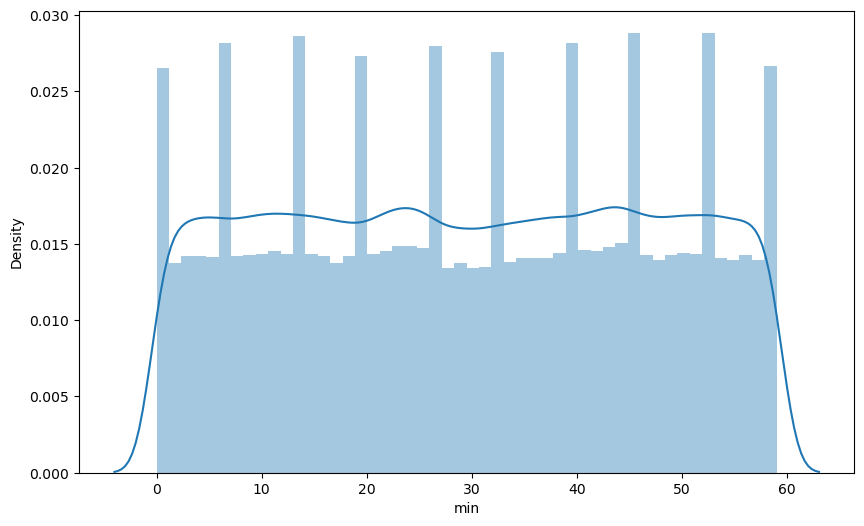

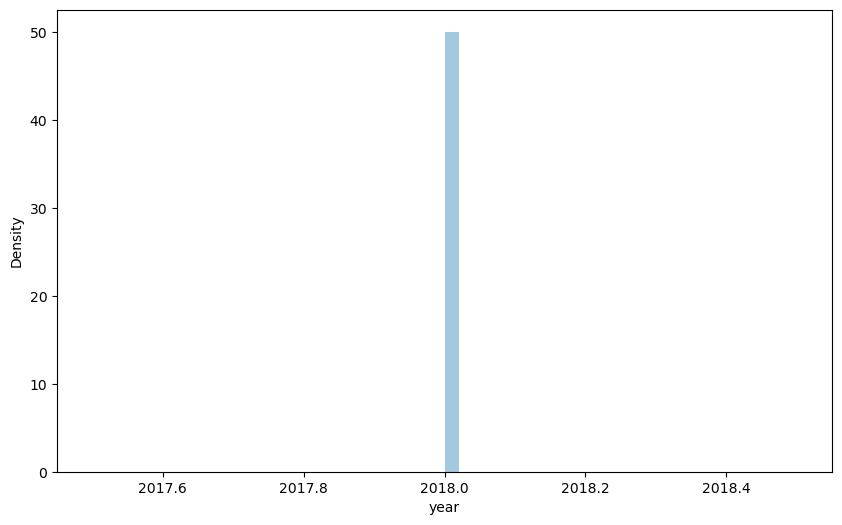

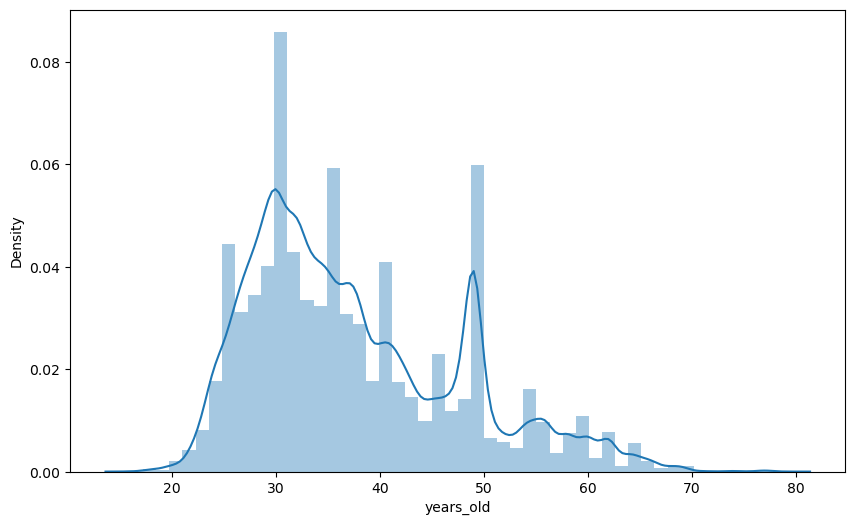

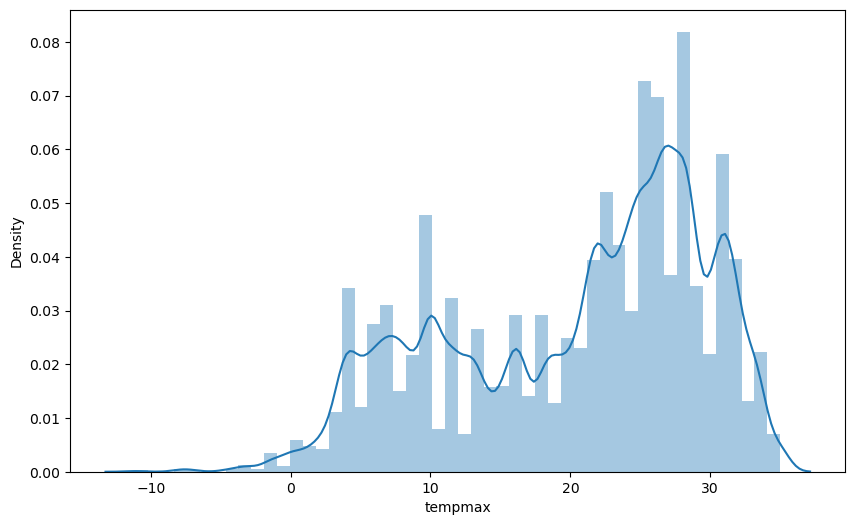

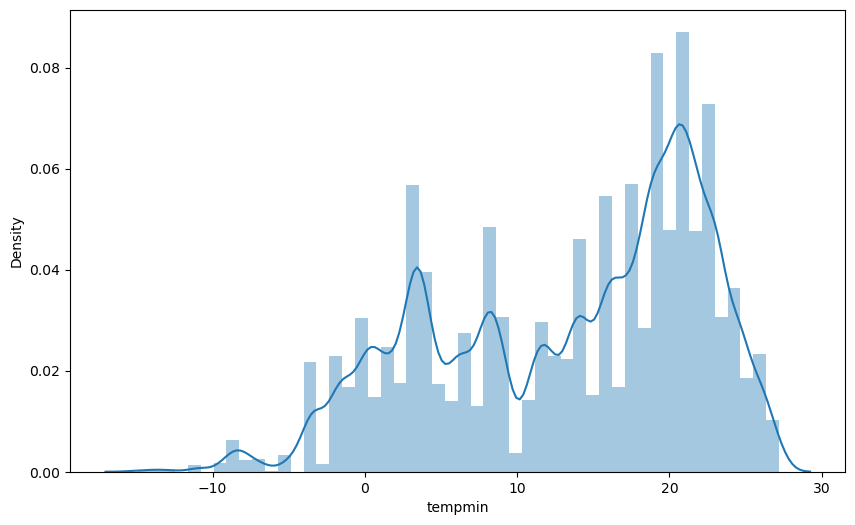

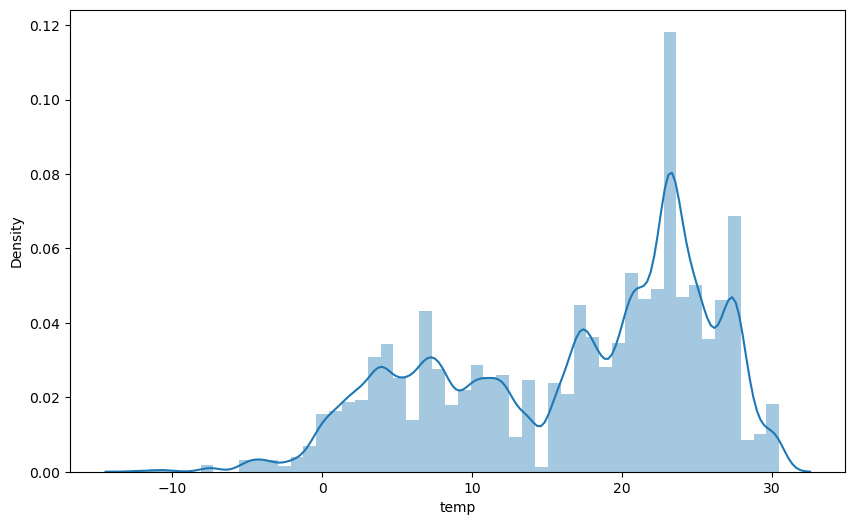

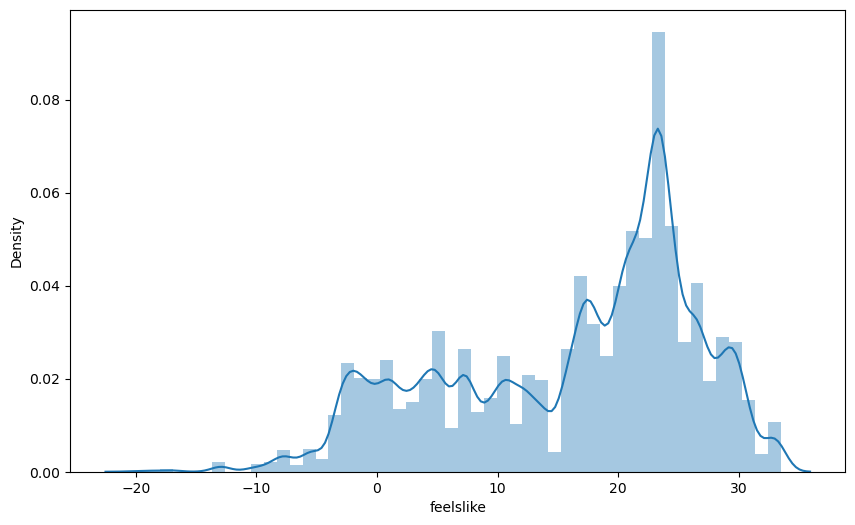

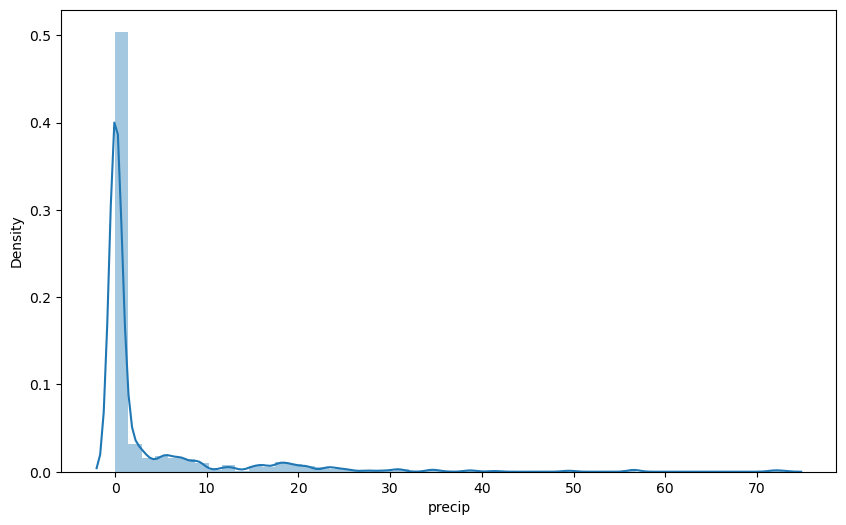

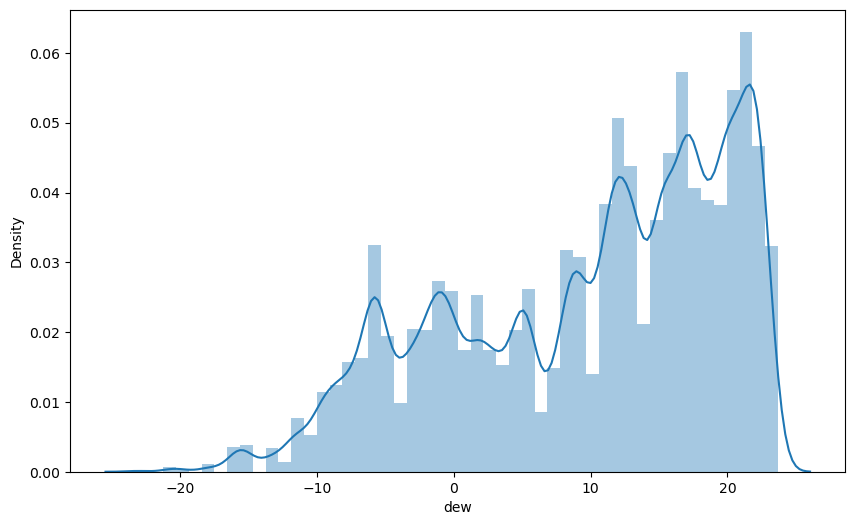

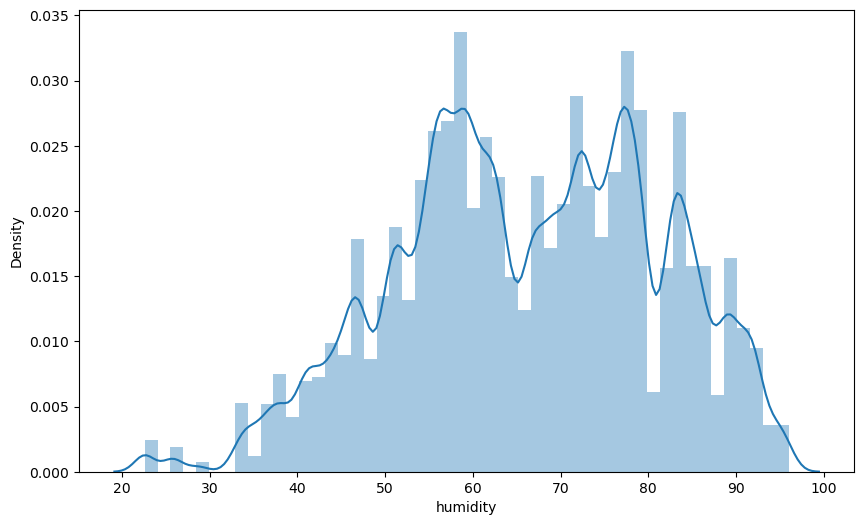

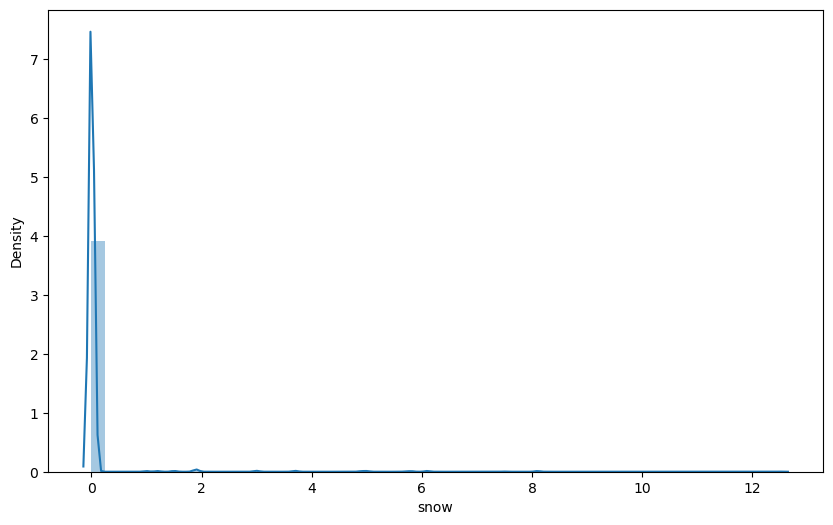

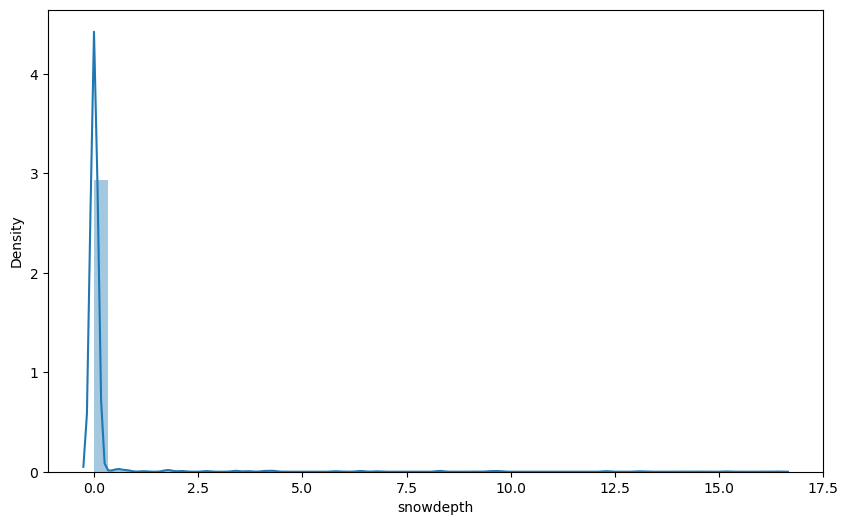

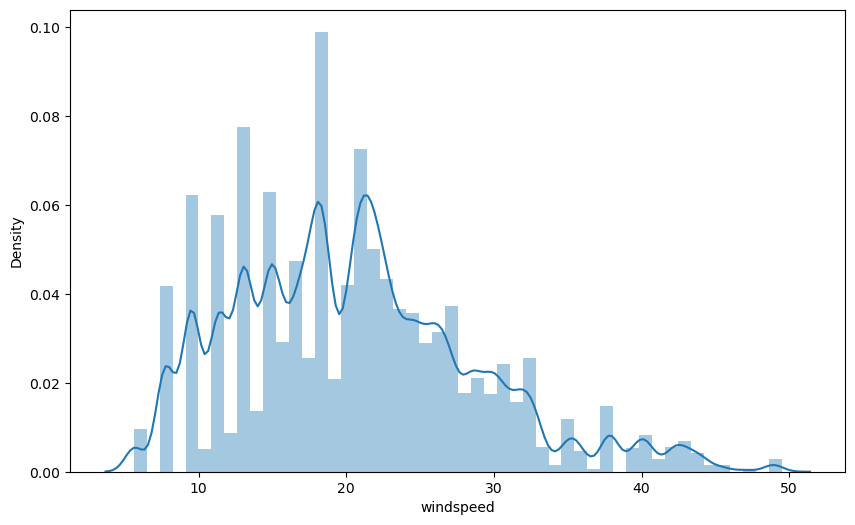

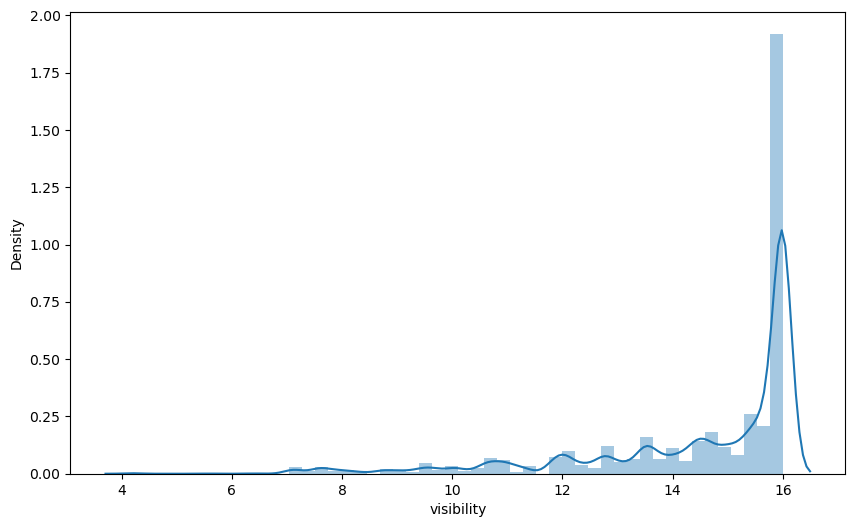

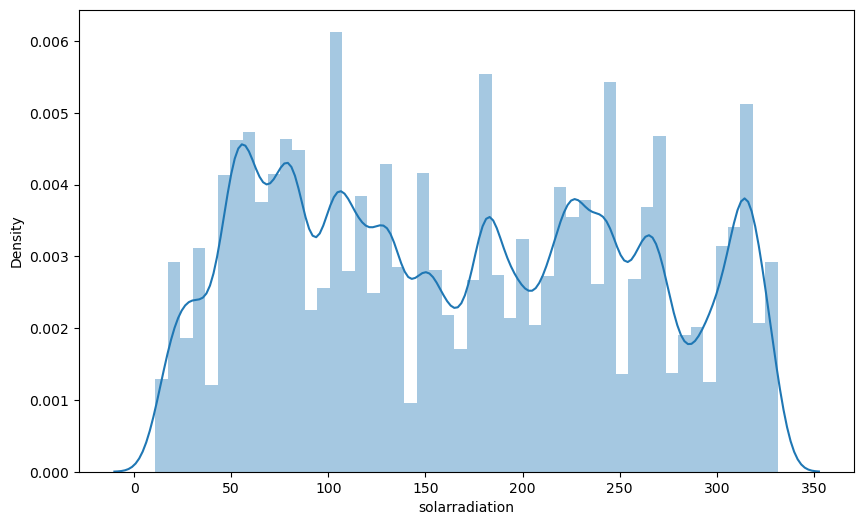

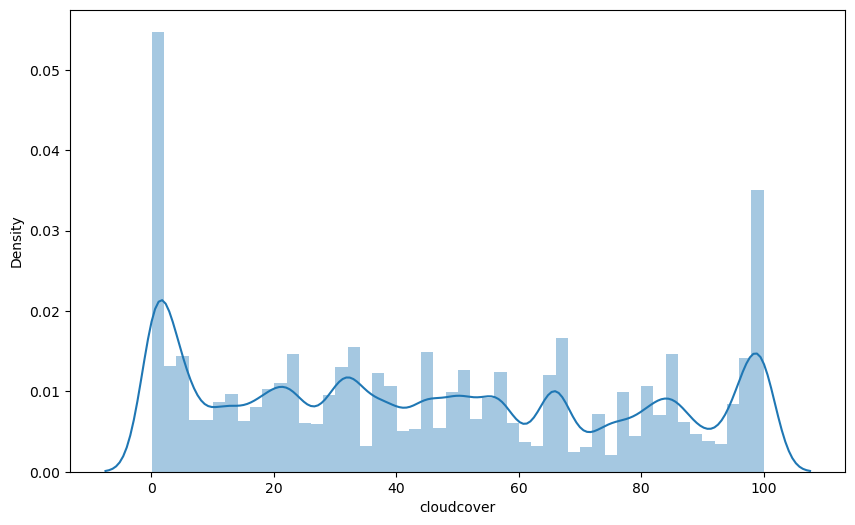

In [56]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
    plt.figure(figsize=(10,6))
    sns.distplot(x=tripdata[col])
    plt.xlabel(col)
plt.show()

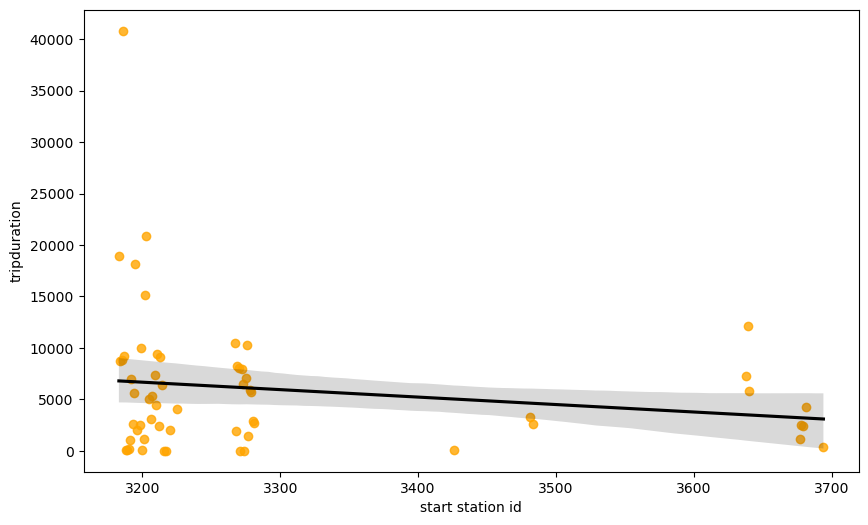

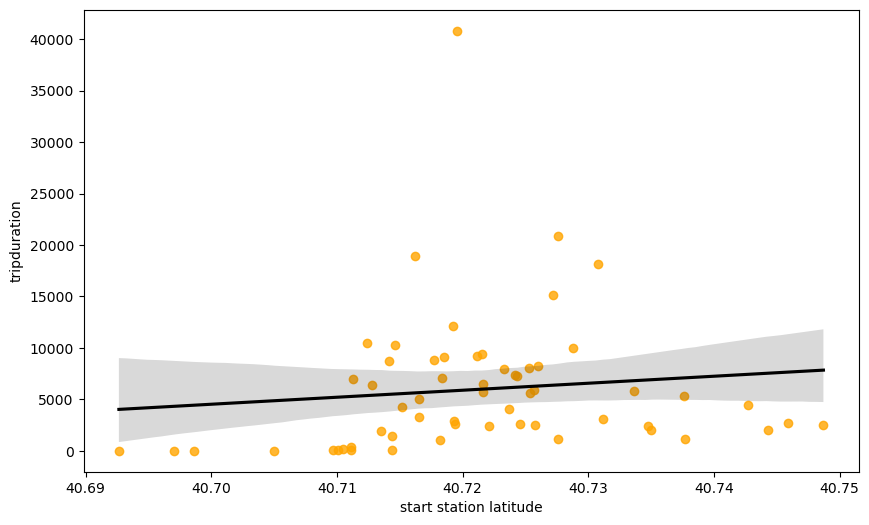

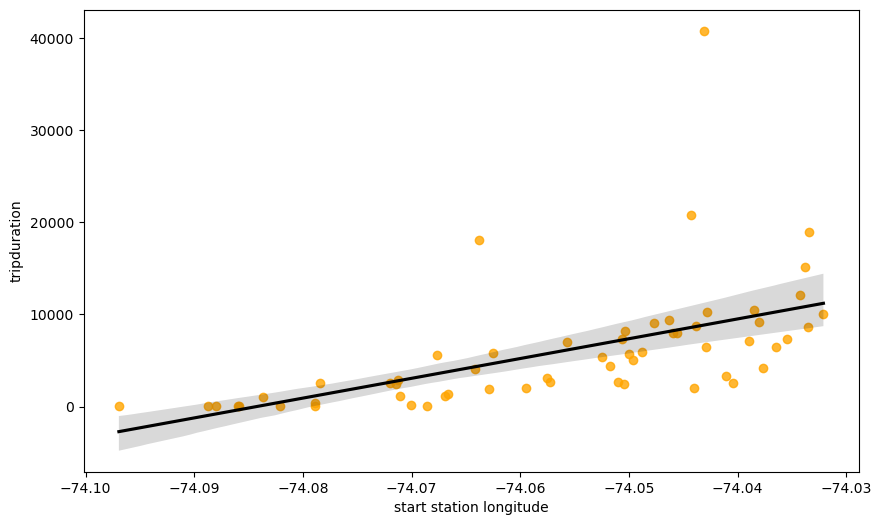

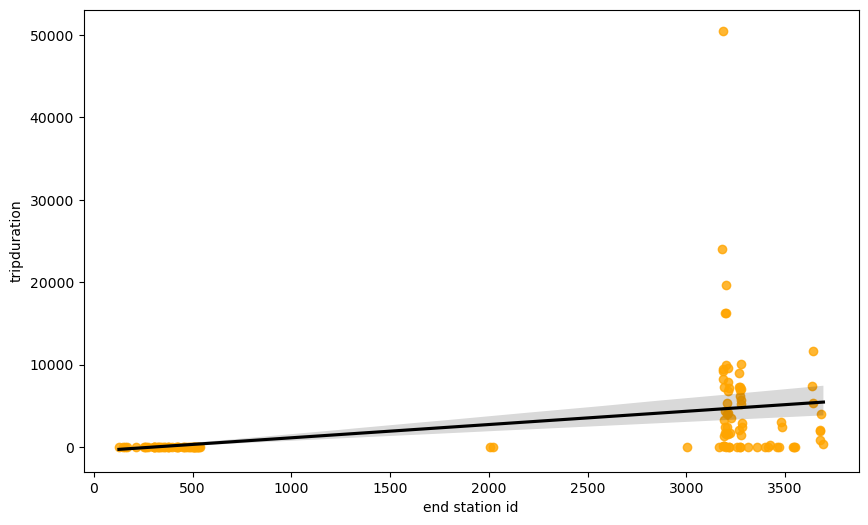

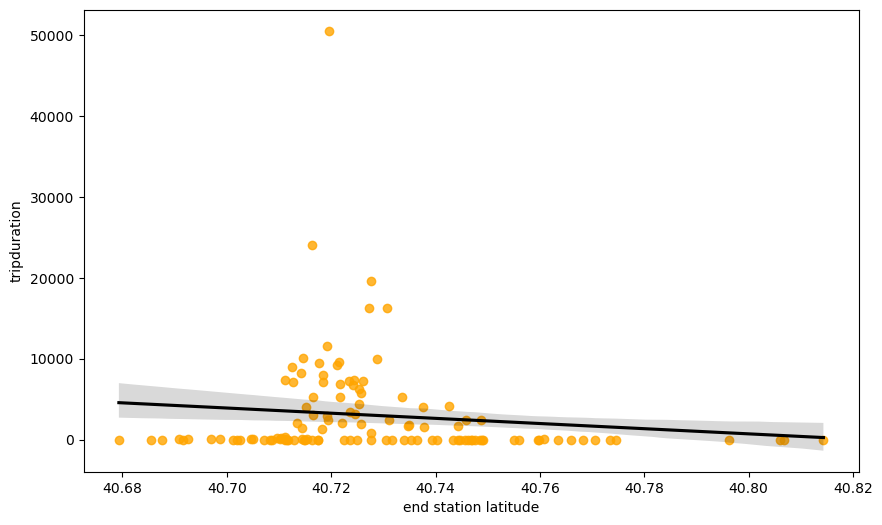

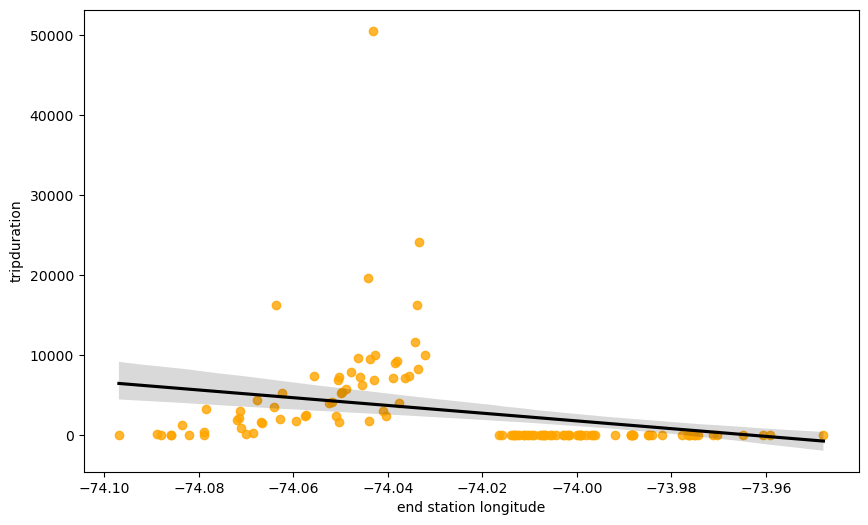

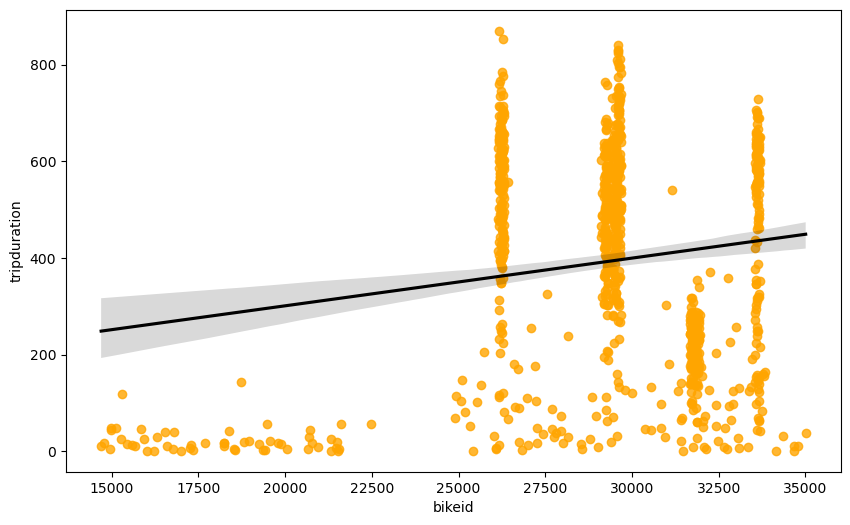

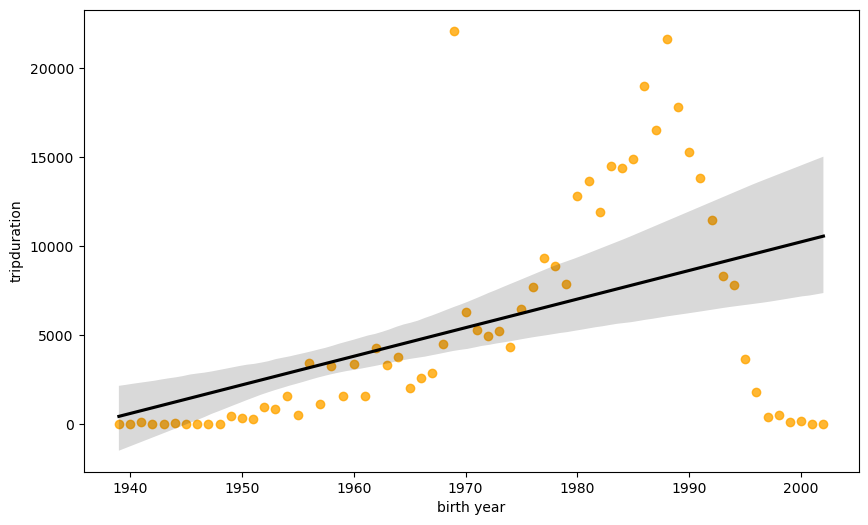

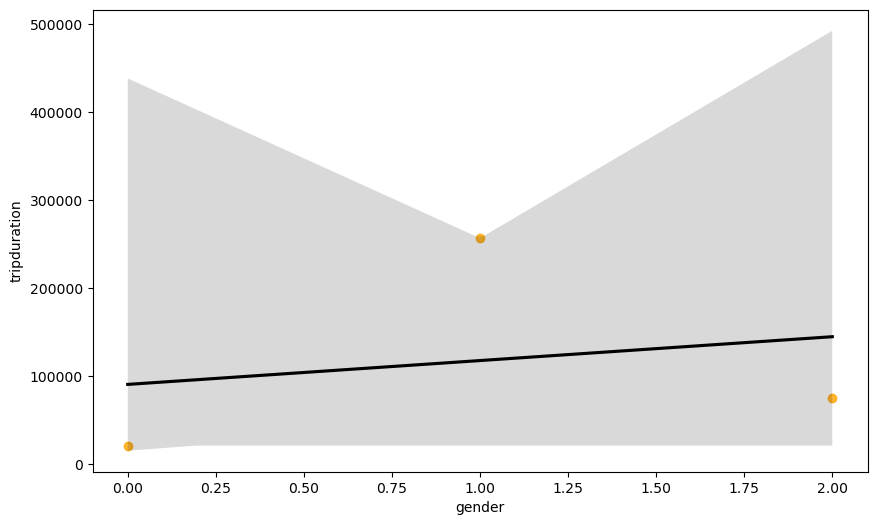

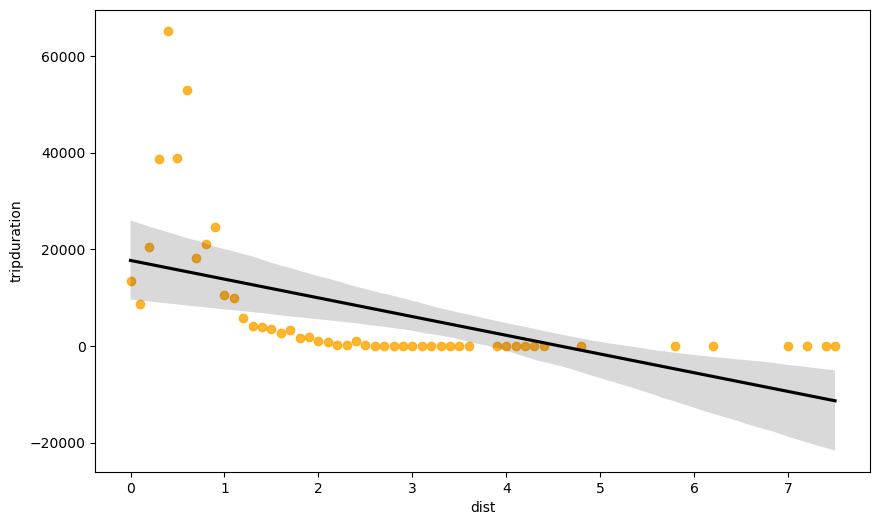

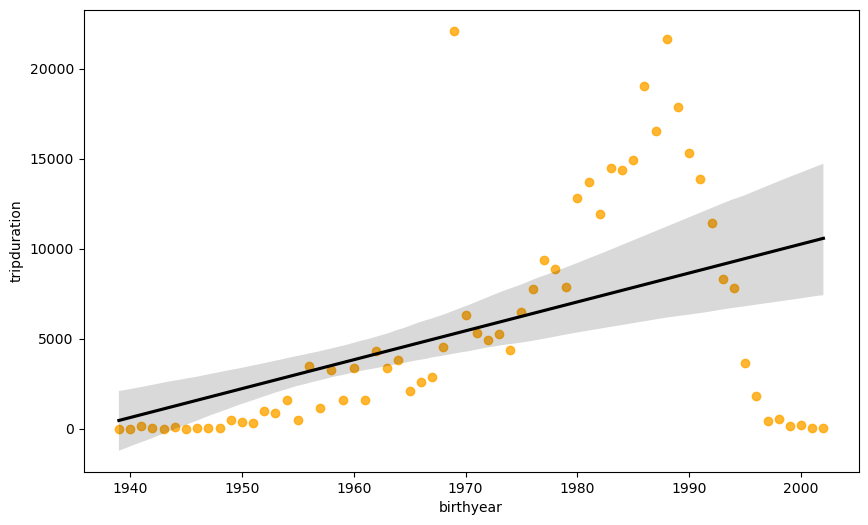

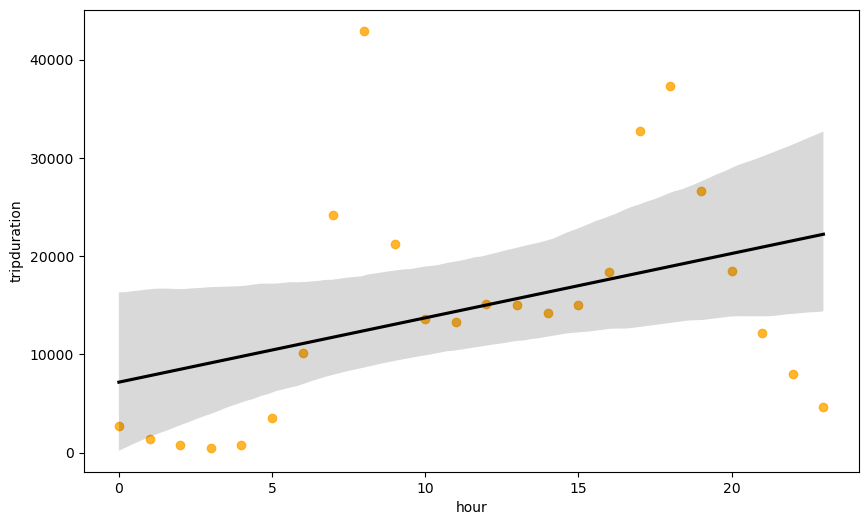

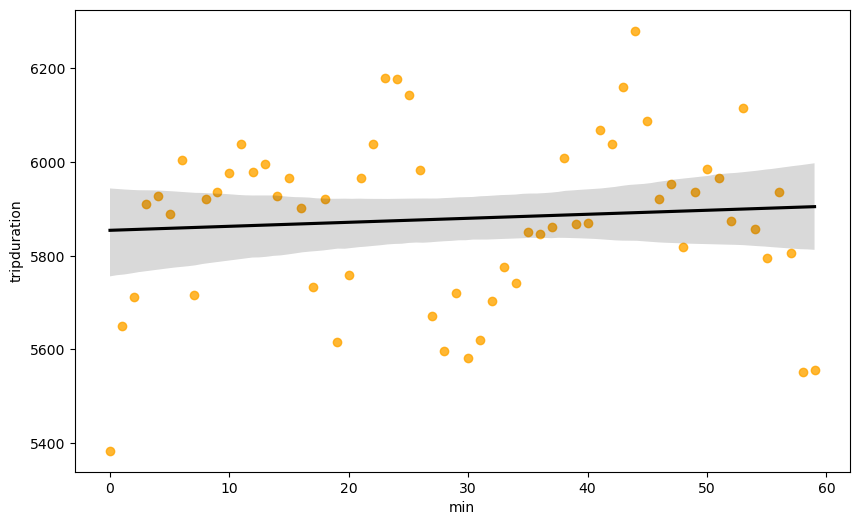

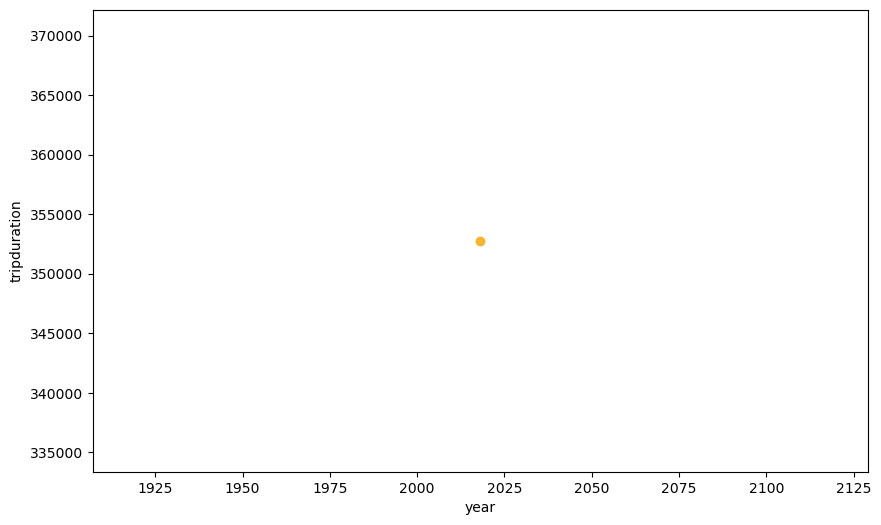

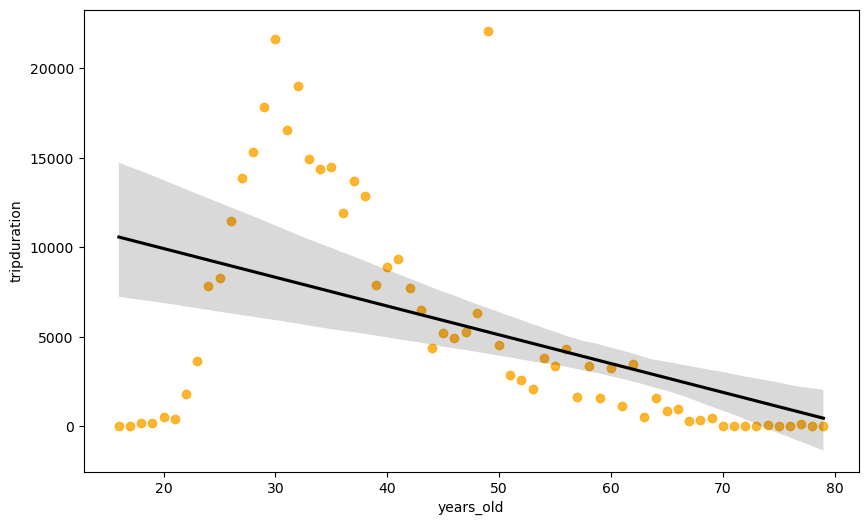

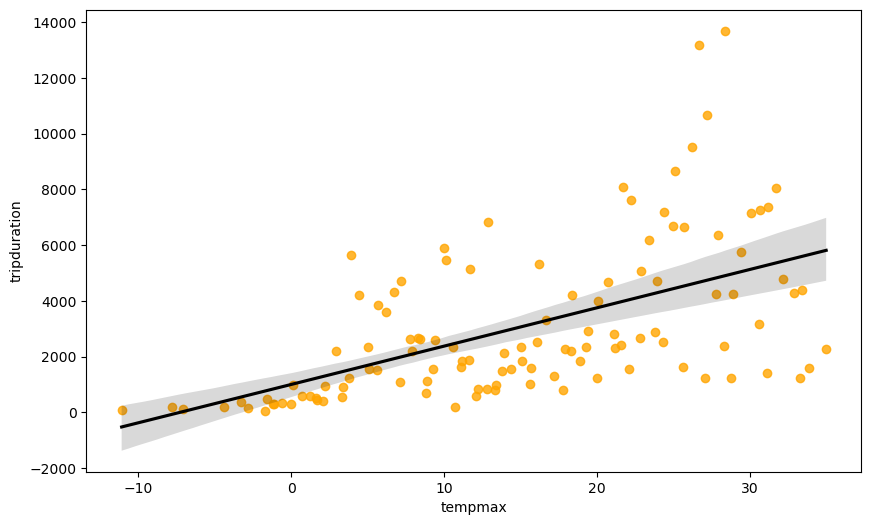

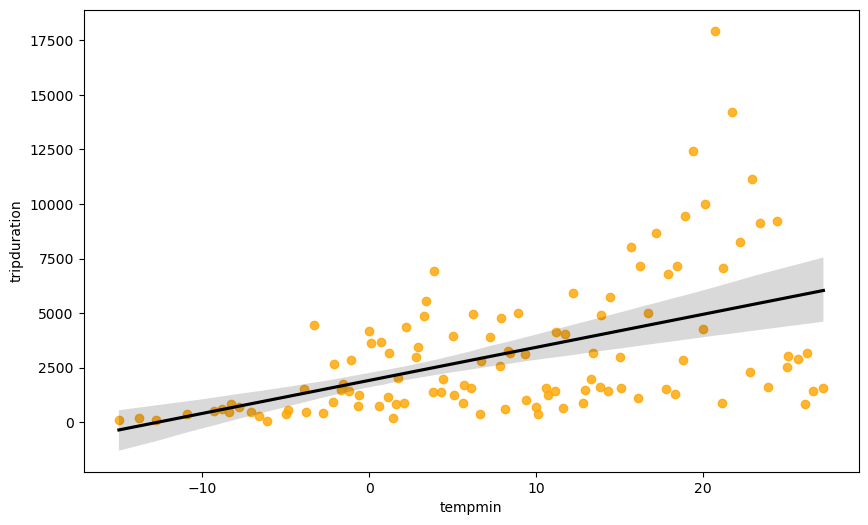

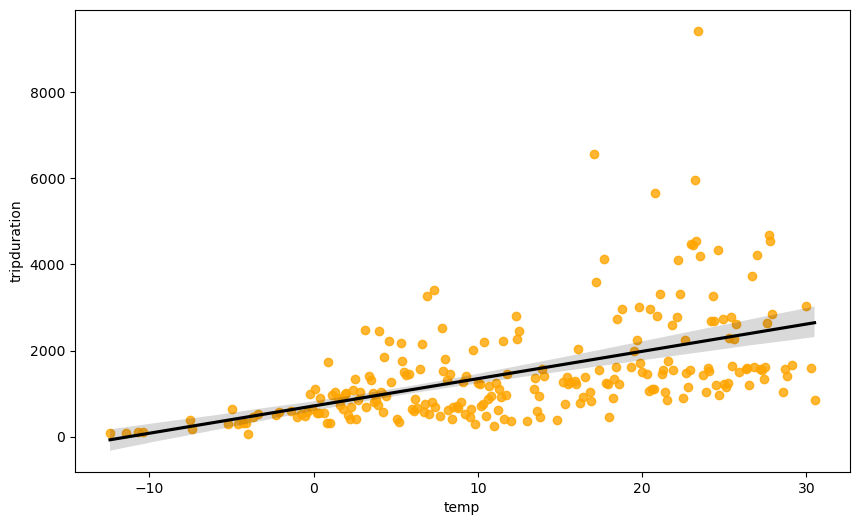

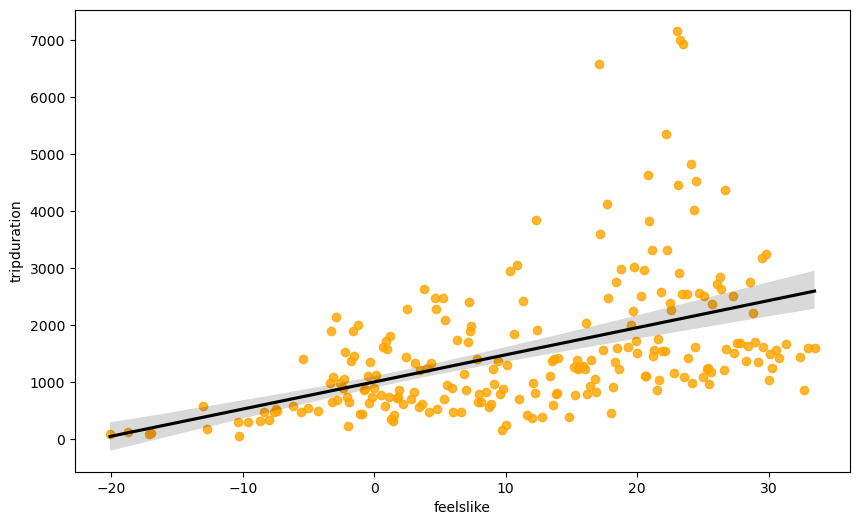

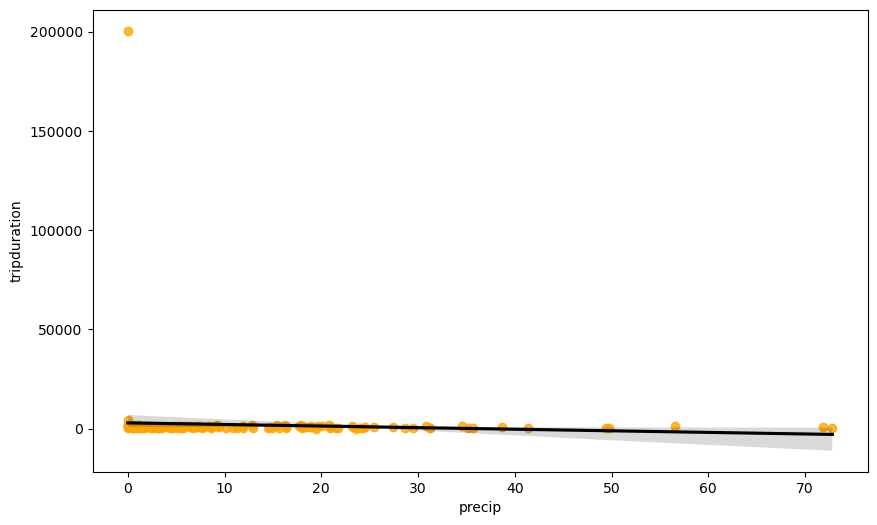

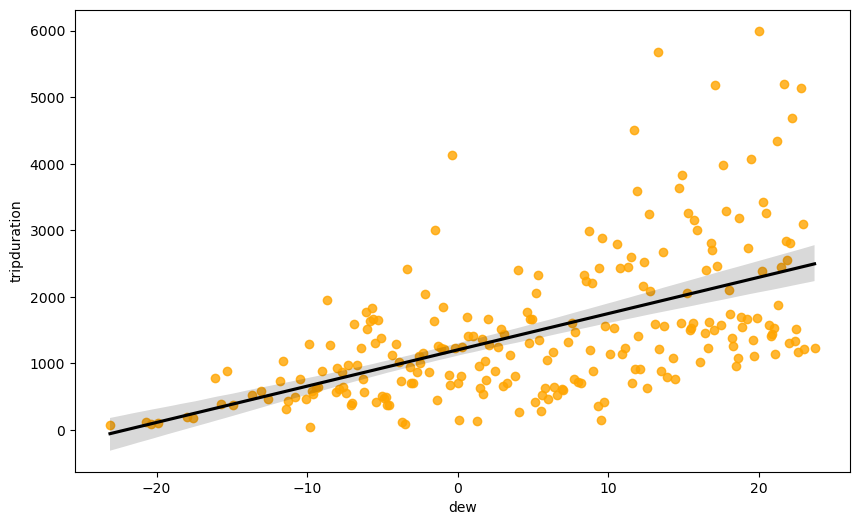

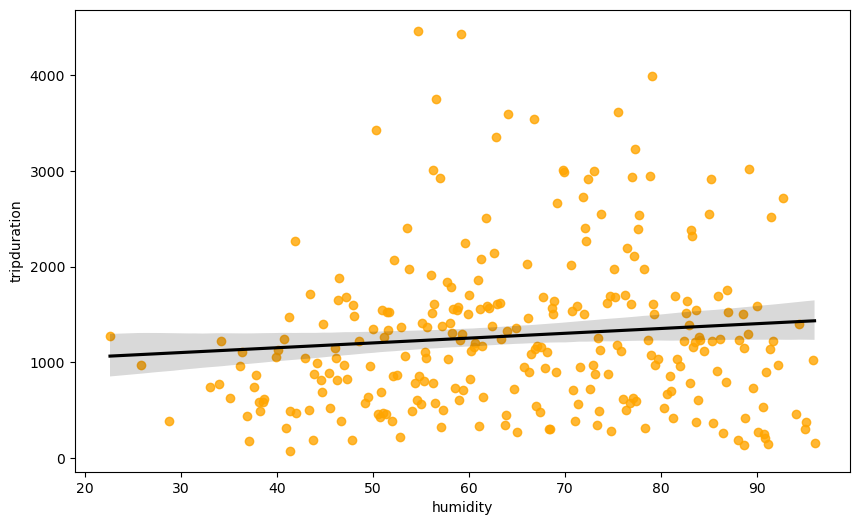

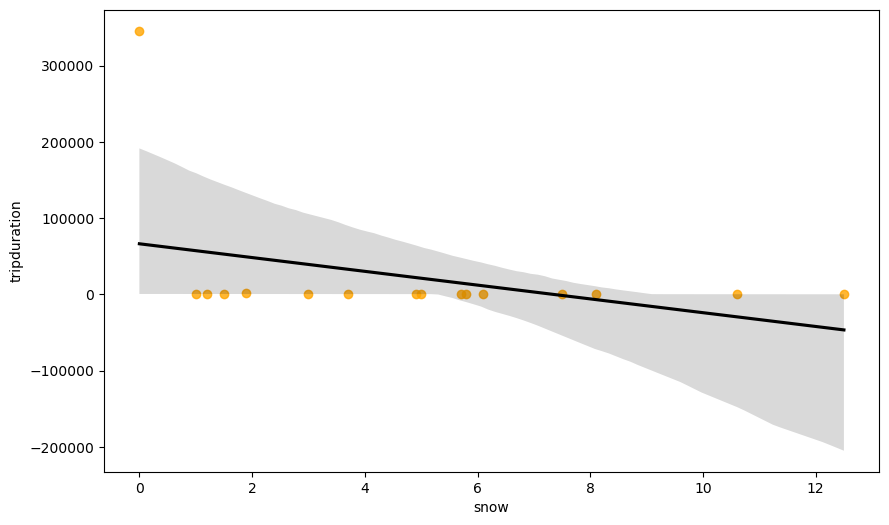

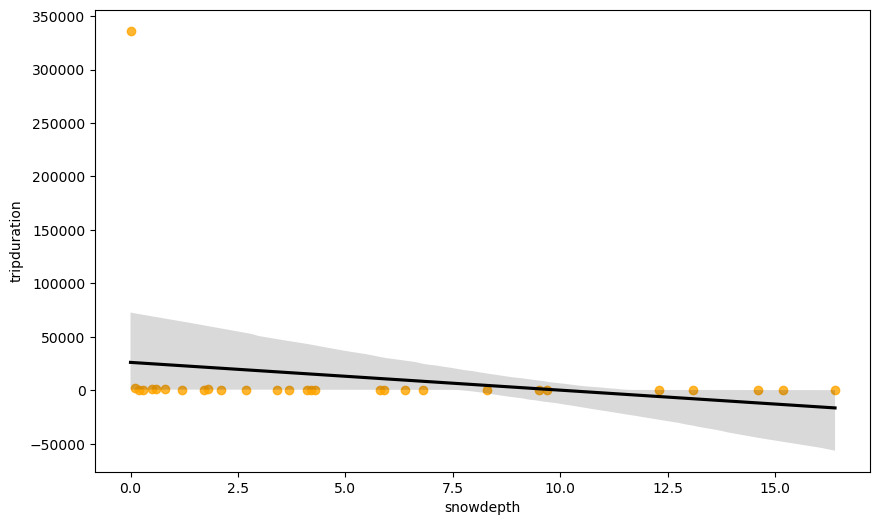

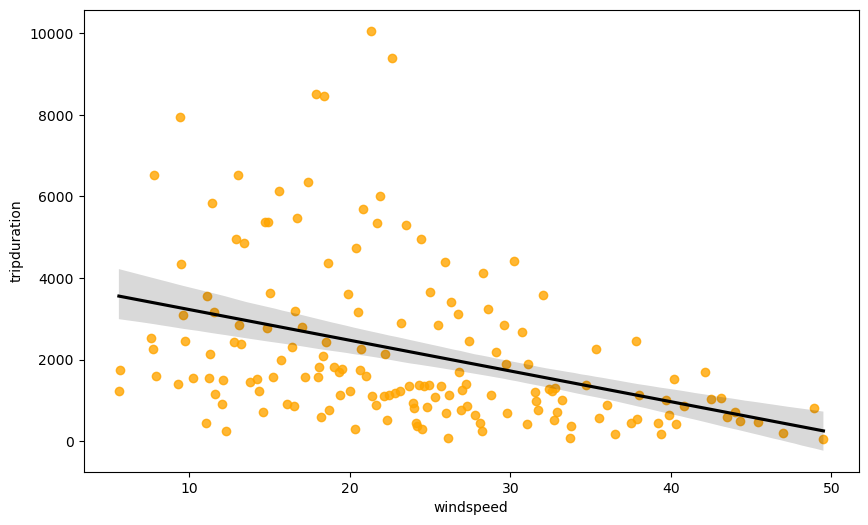

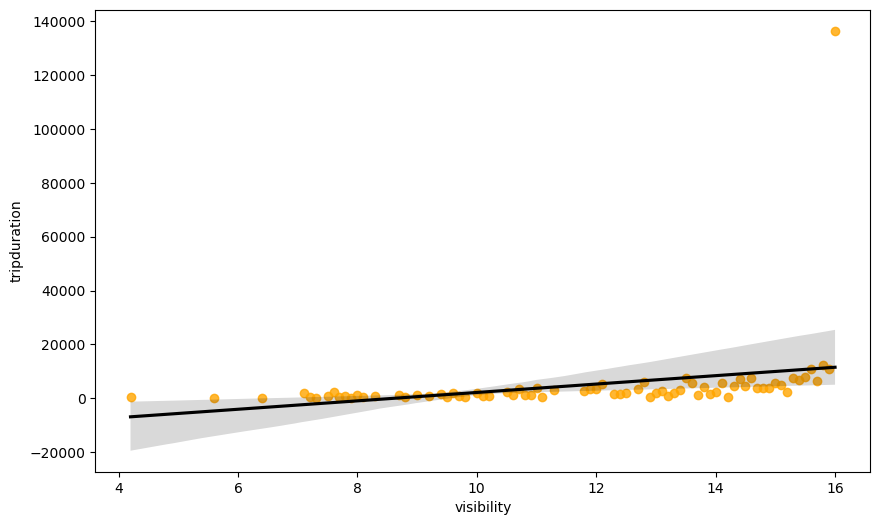

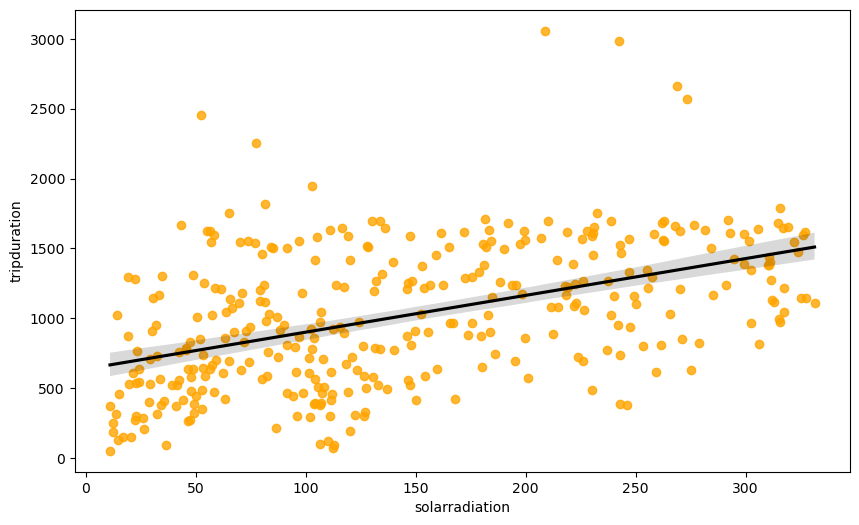

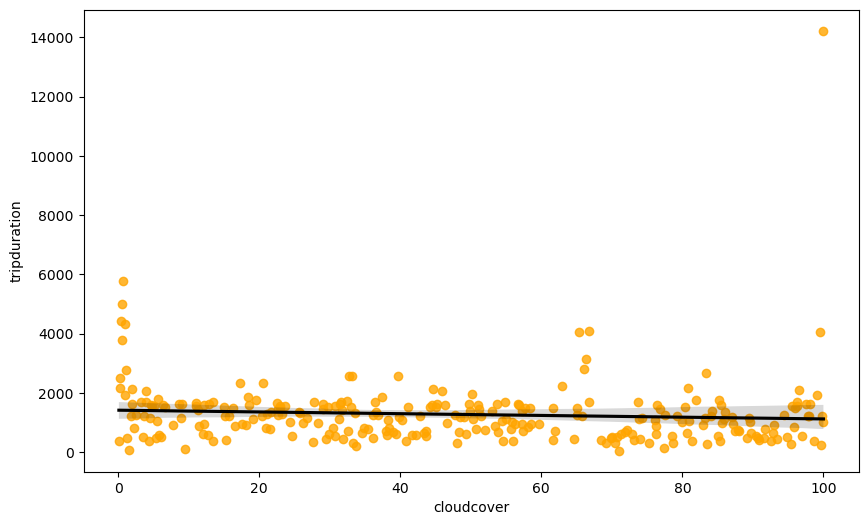

In [57]:
for col in numerical_features:
    if col != 'tripduration':
        fig,ax=plt.subplots(figsize=(10,6))
        df = tripdata.groupby(col)['tripduration'].agg('count').reset_index()
        sns.regplot(x=df[col],y=df['tripduration'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

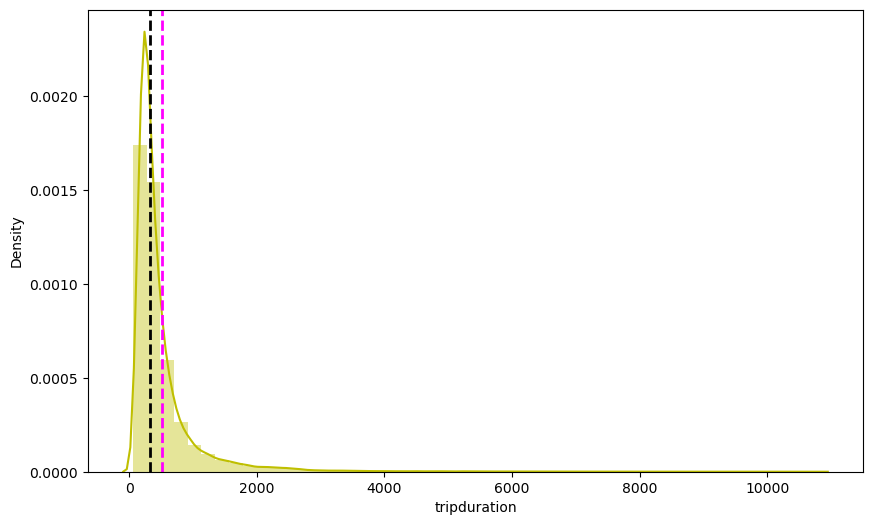

In [58]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('tripduration')
plt.ylabel('Density')
ax=sns.distplot(tripdata['tripduration'],hist=True ,color="y")
ax.axvline(tripdata['tripduration'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(tripdata['tripduration'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

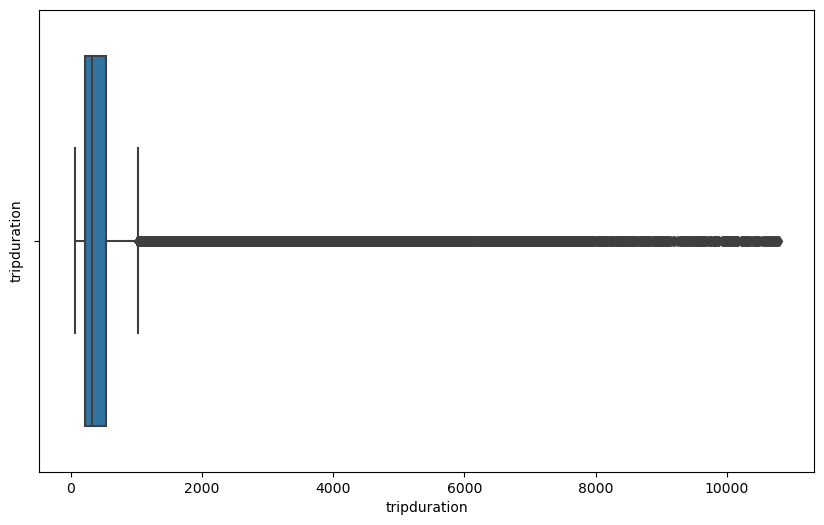

In [59]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('tripduration')
sns.boxplot(x=tripdata['tripduration'])
plt.show()

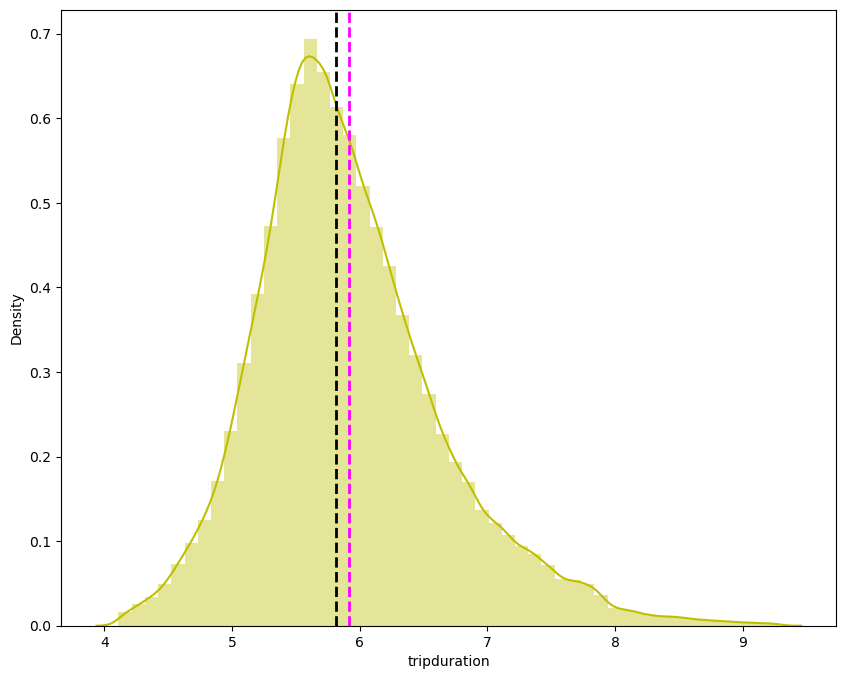

In [60]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('tripduration')
plt.ylabel('Density')

ax=sns.distplot(np.log(tripdata['tripduration']), color="y")
ax.axvline(np.log(tripdata['tripduration']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.log(tripdata['tripduration']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

[Text(0.5, 1.0, 'Theoritical quantiles')]

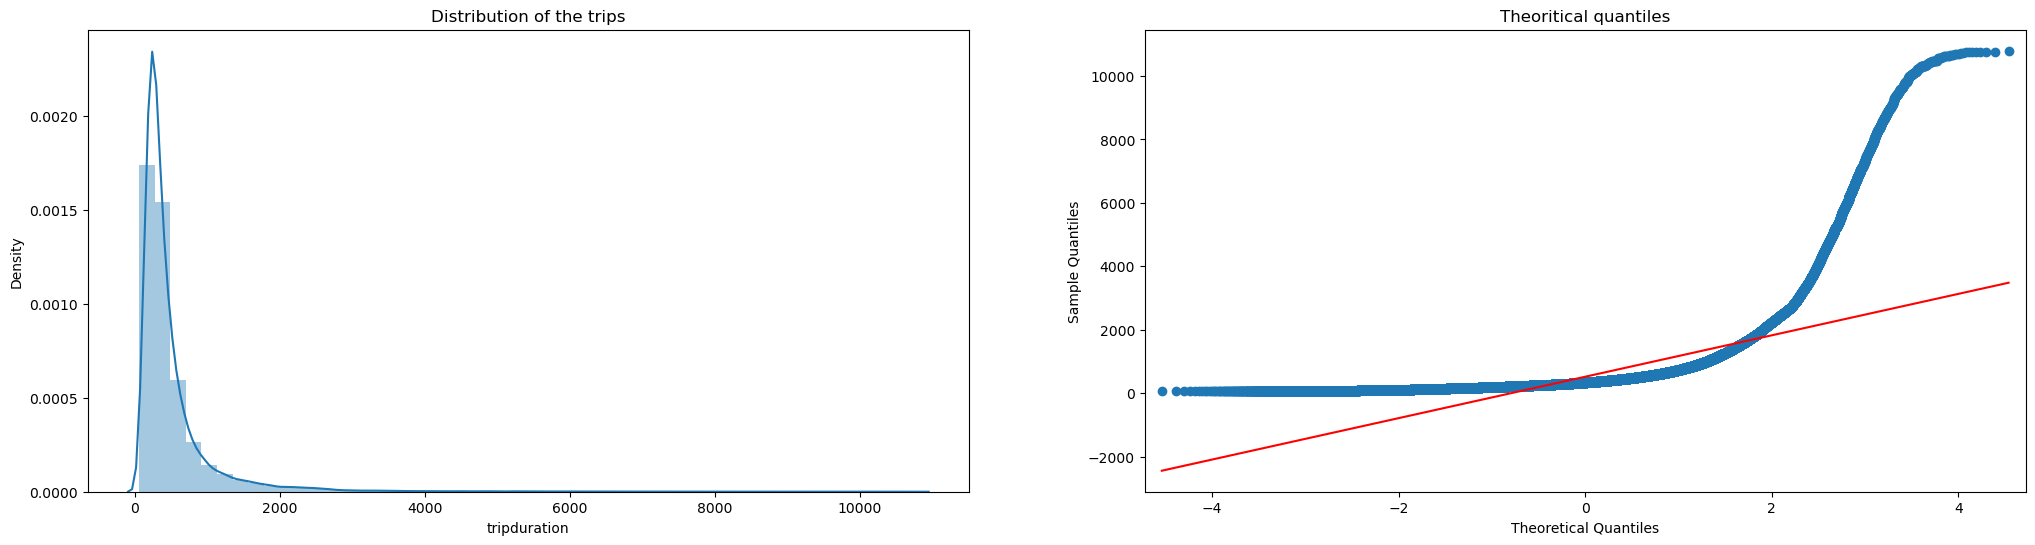

In [133]:
## before applying log
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(25,6))
sns.distplot(tripdata['tripduration'], ax=ax1)
ax1.set(title='Distribution of the trips')
qqplot(tripdata['tripduration'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

[Text(0.5, 1.0, 'Theoritical quantiles')]

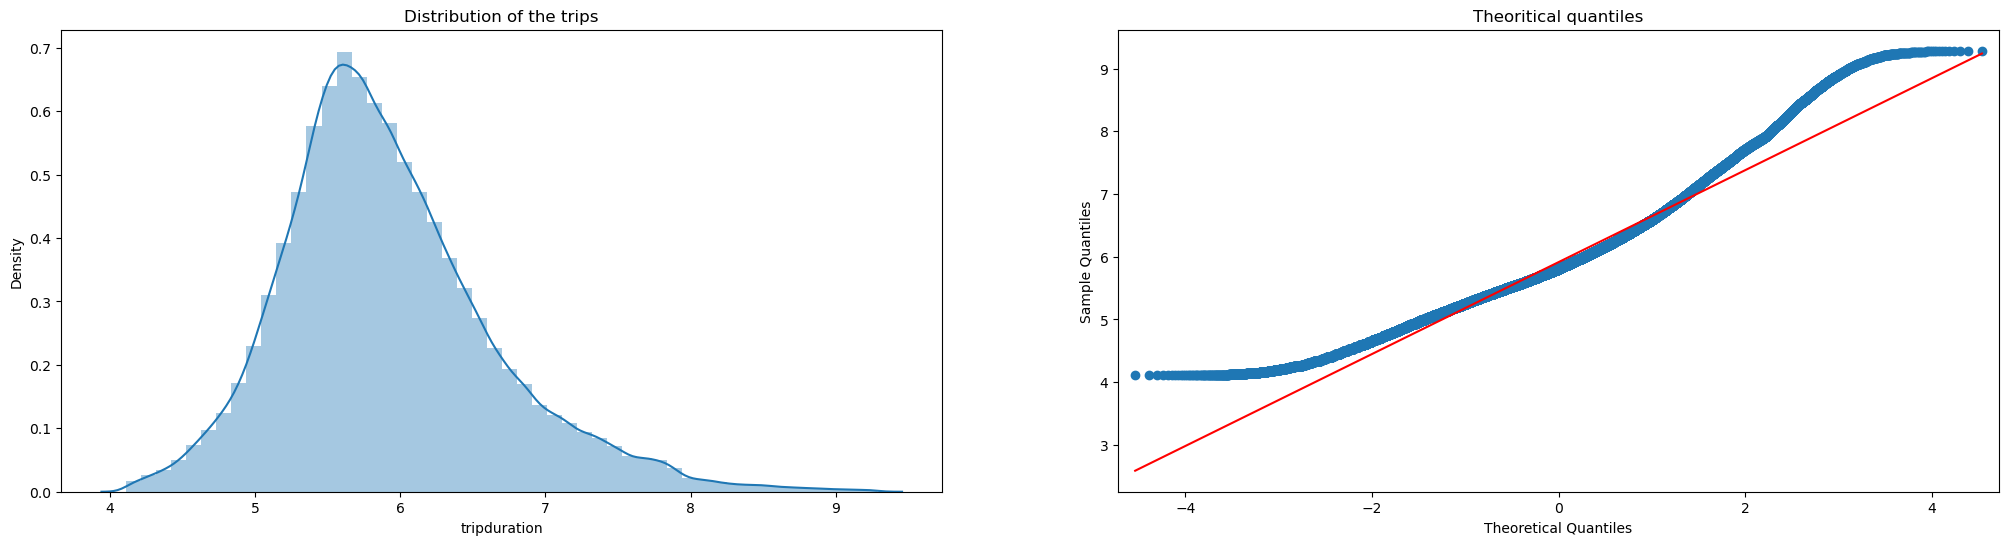

In [134]:
## after applying log
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(25,6))
sns.distplot(np.log(tripdata['tripduration']), ax=ax1)
ax1.set(title='Distribution of the trips')
qqplot(np.log(tripdata['tripduration']), ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')


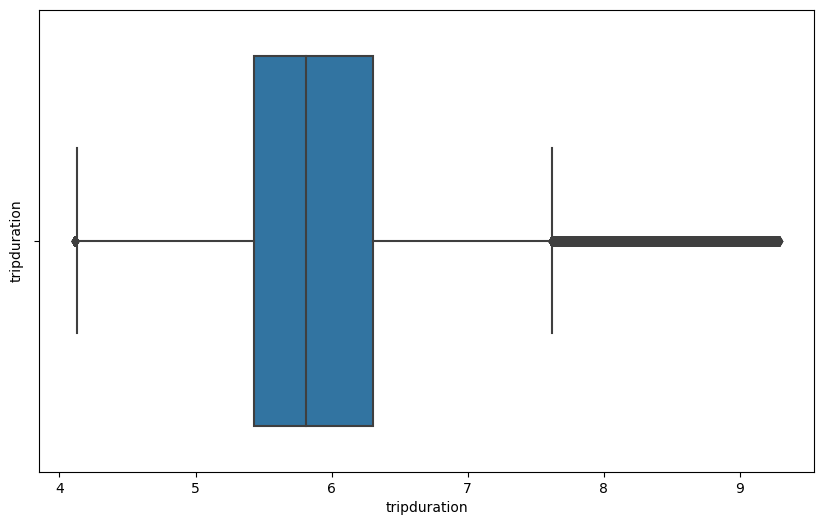

In [61]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('tripduration')
sns.boxplot(x=np.log(tripdata['tripduration']))
plt.show()

In [62]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352767 entries, 0 to 353891
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             352767 non-null  int64  
 1   starttime                352767 non-null  object 
 2   stoptime                 352767 non-null  object 
 3   start station id         352767 non-null  int64  
 4   start station name       352767 non-null  object 
 5   start station latitude   352767 non-null  float64
 6   start station longitude  352767 non-null  float64
 7   end station id           352767 non-null  int64  
 8   end station name         352767 non-null  object 
 9   end station latitude     352767 non-null  float64
 10  end station longitude    352767 non-null  float64
 11  bikeid                   352767 non-null  int64  
 12  usertype                 352767 non-null  object 
 13  birth year               352767 non-null  int64  
 14  gend

In [75]:
tripdata.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'dist', 'birthyear', 'date', 'month', 'day',
       'hour', 'min', 'year', 'years_old', 'age_group', 'holiday', 'datetime',
       'tempmax', 'tempmin', 'temp', 'feelslike', 'precip', 'dew', 'humidity',
       'snow', 'snowdepth', 'windspeed', 'visibility', 'solarradiation',
       'cloudcover', 'conditions', 'description', 'seasons'],
      dtype='object')

#### Based on the analysis and corealtion matrix we can choose the number od features needed for bike tripduration prediction

In [119]:
features = ['tripduration','start station latitude','start station longitude', 
            'end station latitude', 'end station longitude','usertype',
        'gender', 'dist', 'birthyear', 'date', 'month', 'day',
       'hour', 'min', 'year', 'years_old', 'holiday', 'datetime', 'temp', 'feelslike', 'precip', 'dew', 'humidity',
       'snow', 'windspeed', 'visibility', 'solarradiation', 'conditions', 'seasons']

In [120]:
df =tripdata[features]
df = df.rename(columns={"start station latitude": "start_lat", "start station longitude": "start_lon", "end station latitude": "end_lat",
                  "end station longitude":"end_lon"})

## convert into more meaningfull way
1. day -- weekday/ weekend
2. holiday -- working/non-working

In [121]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday','Sunday']

df['day'] = df['day'].apply(lambda x: 'weekday' if x in weekday else 'weekend')

In [122]:
df['holiday'] = df['holiday'].apply(lambda x: 'working_day' if x == 'No Holiday' else 'holiday')

In [123]:
df['conditions'].unique()

array(['Clear', 'Snow, Partially cloudy', 'Snow',
       'Snow, Rain, Partially cloudy', 'Partially cloudy',
       'Rain, Overcast', 'Rain, Partially cloudy', 'Overcast',
       'Snow, Rain, Overcast', 'Snow, Rain', 'Rain'], dtype=object)

In [124]:
df

tripduration  start_lat  start_lon    end_lat    end_lon    usertype  \
0                932  40.716247 -74.033459  40.728745 -74.032108  Subscriber   
1                550  40.716247 -74.033459  40.728745 -74.032108  Subscriber   
2                510  40.716247 -74.033459  40.728745 -74.032108  Subscriber   
3                354  40.716247 -74.033459  40.712419 -74.038526  Subscriber   
4                250  40.716247 -74.033459  40.719252 -74.034234  Subscriber   
...              ...        ...        ...        ...        ...         ...   
353887          1081  40.711130 -74.078900  40.726012 -74.050389  Subscriber   
353888           344  40.711130 -74.078900  40.719282 -74.071262  Subscriber   
353889          1233  40.711130 -74.078900  40.719586 -74.043117  Subscriber   
353890          1057  40.711130 -74.078900  40.718489 -74.047727  Subscriber   
353891           301  40.711130 -74.078900  40.714358 -74.066611  Subscriber   

        gender  dist  birthyear        date  ... feelslike  precip   dew  \
0            1   0.9       1992  2018-01-01  ...     -17.0   0.000 -19.9   
1            2   0.9       1969  2018-01-01  ...     -17.0   0.000 -19.9   
2            1   0.9       1946  2018-01-01  ...     -17.0   0.000 -19.9   
3            1   0.4       1994  2018-01-01  ...     -17.0   0.000 -19.9   
4            1   0.2       1991  2018-01-01  ...     -17.0   0.000 -19.9   
...        ...   ...        ...         ...  ...       ...     ...   ...   
353887       1   1.8       1993  2018-12-22  ...       4.2   0.588   1.8   
353888       2   0.7       1983  2018-12-25  ...      -2.0   0.000  -6.4   
353889       1   2.0       1988  2018-12-29  ...       7.4   0.000   2.7   
353890       2   1.7       1991  2018-12-30  ...       0.0   0.000  -3.1   
353891       1   0.7       1991  2018-12-31  ...       3.5  21.756   1.9   

        humidity  snow  windspeed visibility solarradiation  \
0           47.8   0.0       18.5       16.0          106.7   
1           47.8   0.0       18.5       16.0          106.7   
2           47.8   0.0       18.5       16.0          106.7   
3           47.8   0.0       18.5       16.0          106.7   
4           47.8   0.0       18.5       16.0          106.7   
...          ...   ...        ...        ...            ...   
353887      67.4   0.0       45.4       15.3           47.8   
353888      52.8   0.0       24.9       16.0           86.5   
353889      63.9   0.0       39.2       15.8           94.2   
353890      66.0   0.0       20.8       15.5           35.6   
353891      78.2   0.0       21.7       12.4           34.8   

                    conditions  seasons  
0                        Clear   winter  
1                        Clear   winter  
2                        Clear   winter  
3                        Clear   winter  
4                        Clear   winter  
...                        ...      ...  
353887          Rain, Overcast   winter  
353888        Partially cloudy   winter  
353889        Partially cloudy   winter  
353890        Partially cloudy   winter  
353891  Rain, Partially cloudy   winter  

[352767 rows x 29 columns]

In [125]:
df.to_csv("../dataset/final_bike_sharing.csv", index=False,)